In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score
from nltk.tokenize import word_tokenize
from nltk import ngrams
import nltk
nltk.download('punkt')
from bs4 import BeautifulSoup
import re
import re
import string
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

[nltk_data] Downloading package punkt to /home/student4/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
train_df = pd.read_csv("Stansford_english_corpus_sentences_train-Copy1.csv")
test_df = pd.read_csv("Stansford_english_corpus_sentences_test-Copy1.csv")
print("done")

done


In [3]:


#train_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/SEM2/MINI PROJECT/Train_Stansford_english_corpus_sentences_train.csv")
#test_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/SEM2/MINI PROJECT/Test_Stansford_english_corpus_sentences_test.csv")

In [4]:
train_df.head()

,id,doc_id,sent,errors,native_language,age_range,score,ans1,ans1_errors,ans1_score,ans2,ans2_errors,ans2_score
0,1,doc2664,"I was <ns type=""S""><i>shoked</i><c>shocked</c>...","['S', 'S', 'RV']",Russian,21-25,21.0,"<p>Dear Ms Helen Ryan,</p>\n <p>Thank...","['RP', 'W', 'MD', 'MD', 'RP', 'S', 'MT', 'FV',...",3.1,"<p>Dear Kim,</p>\n <p>Thank you for y...","['TV', 'DJ', 'S', 'RD', 'TV', 'FV', 'RA', 'MD'...",2.1
1,2,doc648,I am very sorry to say it was definitely not a...,"['MT', 'RT']",French,26-30,38.0,<p>17th June 2000</p>\n <p>Dear Sir o...,"['MP', 'RA', 'MQ', 'UA', 'AGV', 'IV', 'TV', 'M...",5.2,<p>Modern technology is affecting my daily lif...,"['MA', 'TV', 'S', 'RP', 'RT', 'RP', 'TV', 'UP'...",5.1
2,3,doc1081,"Of course, I became aware of her feelings sinc...",['AGQ'],Spanish,16-20,36.0,<p>Dear Sir/Madam; I am writing to complain ab...,"['UN', 'R', 'RV', 'RT', 'AGQ', 'W', 'RV', 'M',...",5.2,"<p>Unfortunately, Pat wasn't very good at keep...","['RN', 'RV', 'AGV', 'S', 'ID', 'AGQ', 'RT']",5.3
3,4,doc724,I also suggest that more plays and films shoul...,"['RV', 'FV']",Japanese,21-25,33.0,<p>Dear Jane Clark</p>\n <p>With <NS ...,"['RN', 'UA', 'RP', 'TV', 'MD', 'RN', 'RN', 'RV...",5.1,<p>Dear Albert</p>\n <p>Thanks for yo...,"['RP', 'RJ', 'MD', 'MD', 'M', 'S', 'RC', 'W', ...",4.2
4,5,doc567,"Although my parents were very happy <ns type=""...","['RT', 'FD', 'RJ', 'MT']",Spanish,31-40,34.0,<p>Dear Mr Robertson</p>\n <p>Thank y...,"['UP', 'S', 'UN', 'AGN', 'DY', 'UP', 'RJ', 'IV...",4.2,"<p><NS type=""FD""><i>An</i><c>A</c></NS> <NS ty...","['FD', 'RJ', 'S', 'MD', 'AGN', 'RT', 'MQ', 'RT...",4.2


In [5]:
len(train_df)

4124

In [6]:
k = []
for i in range(len(train_df)):
  k.append(len(train_df["sent"][i]))

In [7]:
k.sort()

In [8]:
k[0]

30

In [9]:
k[-1]

956

In [10]:

test_df.head()

,id,doc_id,sent,errors,native_language,age_range,score,ans1,ans1_errors,ans1_score,ans2,ans2_errors,ans2_score
0,1,doc105,"<ns type=""ID""><i>But the way</i><c>By the way<...","['ID', 'RV']",Portuguese,41-50,30.0,"<p>June 13, 2000</p>\n <p>Competition...","['RN', 'RV', 'MD', 'RT', 'MD', 'RN', 'RT', 'R'...",4.1,<p>Shopping is not always enjoyable.</p>\n ...,"['R', 'RQ', 'AGN', 'MD', 'MD', 'DN', 'RJ', 'R'...",4.2
1,2,doc874,"On the other hand, people tend to wear natural...",['MY'],Russian,16-20,30.0,"<p>Dear Sir/Madam,</p>\n <p>Recently ...","['UD', 'MA', 'MV', 'MD', 'TV', 'ID', 'MD', 'FN']",5.1,<p>Fashion of the Future.</p>\n <p>Wh...,"['MD', 'UJ', 'RD', 'AGN', 'RT', 'MY', 'RV', 'R...",3.3
2,3,doc2542,"You <ns type=""UV""><i>should</i></ns> spend mor...","['UV', 'M', 'MV', 'RV', 'UA', 'UP', 'MC', 'DD'...",Chinese,16-20,23.0,<p>Dear Helen:</p>\n <p>I have just r...,"['RT', 'TV', 'AGN', 'R', 'RP', 'RV', 'RN', 'RN...",3.2,<p>Shopping is not always enjoyable</p>\n ...,"['RP', 'RP', 'MD', 'FV', 'MT', 'FV', 'MT', 'MP...",2.2
3,4,doc2987,"It is going to be very <ns type=""RJ"">lovely</n...","['RJ', 'MD']",Turkish,21-25,25.0,<p>12.06.2001</p>\n <p>Dear Mrs Smith...,"['UT', 'RT', 'R', 'UT', 'MP', 'S', 'RT', 'IV',...",3.1,"<p>To: American <NS type=""MP""><i>students</i><...","['MP', 'TV', 'RV', 'AGV', 'FN', 'FN', 'FN', 'R...",2.3
4,5,doc290,Mr White came to our school when he was 40 <ns...,"['AGN', 'UP', 'RJ', 'R', 'AGN']",Italian,21-25,34.0,"<p>Dear Sir or Madam,</p>\n <p>I am w...","['RT', 'RV', 'UP', 'MP', 'RD', 'RN', 'SX', 'RV...",4.3,"<p>Unfortunately, Pat wasn't very good at keep...","['RN', 'UP', 'UD', 'RN', 'W', 'AGN', 'UP', 'RJ...",4.3


In [11]:
train_data = train_df[["sent","ans1","ans2","native_language"]]
test_data = test_df[["sent","ans1","ans2","native_language"]]

In [12]:
df_1 = train_data.drop(["ans1","ans2"],axis = 1)
df_2 = train_data.drop(["sent","ans2"],axis = 1)
df_3 = train_data.drop(["ans1","sent"],axis = 1)
df_1.rename(columns = {'sent':'text'}, inplace = True)
df_2.rename(columns = {'ans1':'text'}, inplace = True)
df_3.rename(columns = {'ans2':'text'}, inplace = True)


df_4 = test_data.drop(["ans1","ans2"],axis = 1)
df_5 = test_data.drop(["sent","ans2"],axis = 1)
df_6 = test_data.drop(["ans1","sent"],axis = 1)
df_4.rename(columns = {'sent':'text'}, inplace = True)
df_5.rename(columns = {'ans1':'text'}, inplace = True)
df_6.rename(columns = {'ans2':'text'}, inplace = True)

In [13]:
frames =[df_2, df_3]
df_train = pd.concat(frames,join = "inner")



frames =[df_5, df_6]
df_test = pd.concat(frames,join = "inner")

In [14]:
df_train.head(5)

,text,native_language
0,"<p>Dear Ms Helen Ryan,</p>\n <p>Thank...",Russian
1,<p>17th June 2000</p>\n <p>Dear Sir o...,French
2,<p>Dear Sir/Madam; I am writing to complain ab...,Spanish
3,<p>Dear Jane Clark</p>\n <p>With <NS ...,Japanese
4,<p>Dear Mr Robertson</p>\n <p>Thank y...,Spanish


In [15]:
df_test.head(5)

,text,native_language
0,"<p>June 13, 2000</p>\n <p>Competition...",Portuguese
1,"<p>Dear Sir/Madam,</p>\n <p>Recently ...",Russian
2,<p>Dear Helen:</p>\n <p>I have just r...,Chinese
3,<p>12.06.2001</p>\n <p>Dear Mrs Smith...,Turkish
4,"<p>Dear Sir or Madam,</p>\n <p>I am w...",Italian


In [16]:
df_train.reset_index(inplace=True)

df_test.reset_index(inplace=True)

In [17]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8248 entries, 0 to 8247
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   index            8248 non-null   int64 
 1   text             8235 non-null   object
 2   native_language  8248 non-null   object
dtypes: int64(1), object(2)
memory usage: 193.4+ KB


In [18]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   index            1000 non-null   int64 
 1   text             997 non-null    object
 2   native_language  1000 non-null   object
dtypes: int64(1), object(2)
memory usage: 23.6+ KB


In [19]:
df_train.dropna(axis =0,inplace=True)
df_train.reset_index(inplace=True)


df_test.dropna(axis =0,inplace=True)
df_test.reset_index(inplace=True)

In [20]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8235 entries, 0 to 8234
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   level_0          8235 non-null   int64 
 1   index            8235 non-null   int64 
 2   text             8235 non-null   object
 3   native_language  8235 non-null   object
dtypes: int64(2), object(2)
memory usage: 257.5+ KB


In [21]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997 entries, 0 to 996
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   level_0          997 non-null    int64 
 1   index            997 non-null    int64 
 2   text             997 non-null    object
 3   native_language  997 non-null    object
dtypes: int64(2), object(2)
memory usage: 31.3+ KB


In [22]:
df_train.isnull().sum()

level_0            0
index              0
text               0
native_language    0
dtype: int64

In [23]:
df_test.isnull().sum()

level_0            0
index              0
text               0
native_language    0
dtype: int64

In [24]:
df_train["native_language"].value_counts()

Spanish       855
Russian       854
Italian       846
Chinese       828
Korean        821
Japanese      814
Portuguese    814
Turkish       803
French        800
German        800
Name: native_language, dtype: int64

In [25]:
df_test["native_language"].value_counts()

German        120
Chinese       114
Portuguese    112
French        110
Turkish        97
Spanish        93
Japanese       92
Italian        90
Korean         87
Russian        82
Name: native_language, dtype: int64

In [26]:
df_train.columns

Index(['level_0', 'index', 'text', 'native_language'], dtype='object')

In [27]:
df_test.columns

Index(['level_0', 'index', 'text', 'native_language'], dtype='object')

In [28]:
df_test["text"][0]

'<p>June 13, 2000</p>\n          <p>Competition. Organiser</p>\n          <p>Helen Ryan</p>\n          <p>Dear Madam:</p>\n          <p>I would like to travel to Camp California only in July because during June I am very busy with my <NS type="RN"><i>tests</i><c>exams</c></NS>. I will <NS type="RV"><i>do</i><c>take</c></NS> <NS type="MD"><c>the</c></NS> F.C.E <NS type="RT"><i>in</i><c>at</c></NS> <NS type="MD"><c>the</c></NS> University of Cambridge and other <NS type="RN"><i>tests</i><c>exams</c></NS> in several subjects <NS type="RT"><i>in</i><c>at</c></NS> my high school.</p>\n          <p>I prefer <NS type="R"><i>my accommodation at Camp</i><c>to stay</c></NS> in tents because it reminds me <NS type="MT"><c>of</c></NS> my first school. It was great. <NS type="ID"><i>But the way</i><c>By the way</c></NS>, I do not like to <NS type="RV"><i>stay</i><c>be</c></NS> alone. I would like to have lots of people near me.</p>\n          <p>Among those activities <NS type="R"><i>that</i><c>fro

In [29]:
df_train["text"][0]

'<p>Dear Ms Helen Ryan,</p>\n          <p>Thank you for first prize. I was glad to win your competition. I look forward to coming soon.</p>\n          <p>I would like to travel in July<NS type="RP"><i>. Because</i><c>, because</c></NS> it is the only <NS type="W"><i>free time I will have</i><c>time I will have free</c></NS>.</p>\n          <p>I was very happy to hear that all accommodation and travel costs are paid for. And I would prefer <NS type="MD"><c>a</c></NS> tent to <NS type="MD"><c>a</c></NS> log cabin<NS type="RP"><i>. Because</i><c>, because</c></NS> I have had <NS type="S"><i>experiance</i><c>experience</c></NS> <NS type="MT"><c>of</c></NS> <NS type="FV"><i>to <NS type="RV"><i><NS type="S"><i>leve</i><c>live</c></NS></i><c>stay</c></NS></i><c>staying</c></NS> in <NS type="MD"><c>a</c></NS> tent and I like it very much.</p>\n          <p>Thank you for <NS type="MD"><c>the</c></NS> chance to do two activities. I would like to choose Tennis and Photography. I <NS type="TV"><i>

In [30]:
df_train.head()

,level_0,index,text,native_language
0,0,0,"<p>Dear Ms Helen Ryan,</p>\n <p>Thank...",Russian
1,1,1,<p>17th June 2000</p>\n <p>Dear Sir o...,French
2,2,2,<p>Dear Sir/Madam; I am writing to complain ab...,Spanish
3,3,3,<p>Dear Jane Clark</p>\n <p>With <NS ...,Japanese
4,4,4,<p>Dear Mr Robertson</p>\n <p>Thank y...,Spanish


In [31]:
df_train["text"][0]

'<p>Dear Ms Helen Ryan,</p>\n          <p>Thank you for first prize. I was glad to win your competition. I look forward to coming soon.</p>\n          <p>I would like to travel in July<NS type="RP"><i>. Because</i><c>, because</c></NS> it is the only <NS type="W"><i>free time I will have</i><c>time I will have free</c></NS>.</p>\n          <p>I was very happy to hear that all accommodation and travel costs are paid for. And I would prefer <NS type="MD"><c>a</c></NS> tent to <NS type="MD"><c>a</c></NS> log cabin<NS type="RP"><i>. Because</i><c>, because</c></NS> I have had <NS type="S"><i>experiance</i><c>experience</c></NS> <NS type="MT"><c>of</c></NS> <NS type="FV"><i>to <NS type="RV"><i><NS type="S"><i>leve</i><c>live</c></NS></i><c>stay</c></NS></i><c>staying</c></NS> in <NS type="MD"><c>a</c></NS> tent and I like it very much.</p>\n          <p>Thank you for <NS type="MD"><c>the</c></NS> chance to do two activities. I would like to choose Tennis and Photography. I <NS type="TV"><i>

###preprocessing


In [32]:
def remove_ns_tag(text):
  l1 = text.replace('"',"")
  start = 0
  end = len(l1)
  i = 0
  count  = l1.count("<NS")
  while i <= count:
    last_index_ns = l1.find("<NS", start, end)
    last_index_c = l1.find("<c",last_index_ns,end)
    re = l1[last_index_ns:last_index_c]
    l1 = l1.replace(re,"")
  
    i = i+1

  return l1

In [33]:
for i in range(len(df_train)):
    df_train["text"][i] = remove_ns_tag(df_train["text"][i])



for i in range(len(df_test)):
    df_test["text"][i] = remove_ns_tag(df_test["text"][i])

/tmp/ipykernel_265373/2354530741.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["text"][i] = remove_ns_tag(df_train["text"][i])
/tmp/ipykernel_265373/2354530741.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["text"][i] = remove_ns_tag(df_test["text"][i])


In [34]:
# function to avoid words overlapping
def create_space(text):
  return text.replace("<"," <")

In [35]:
for i in range(len(df_train)):
    df_train["text"][i] = create_space(df_train["text"][i])



for i in range(len(df_test)):
    df_test["text"][i] = create_space(df_test["text"][i])

/tmp/ipykernel_265373/3824488085.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["text"][i] = create_space(df_train["text"][i])
/tmp/ipykernel_265373/3824488085.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["text"][i] = create_space(df_test["text"][i])


In [36]:

# function to remove HTML tags
def remove_html_tags(text):
    result = BeautifulSoup(text, 'html.parser').get_text()
    return result
  

l4 = '''
 <h1>Article Heading</h1> \
 <p>First sentence of some important article. And another one. And then the last one</p></html>'''
remove_html_tags(l4) 

'\nArticle Heading First sentence of some important article. And another one. And then the last one'

In [37]:
for i in range(len(df_train)):
  df_train['text'][i] = remove_html_tags(df_train["text"][i])



for i in range(len(df_test)):
  df_test['text'][i] = remove_html_tags(df_test["text"][i])

/tmp/ipykernel_265373/369403375.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['text'][i] = remove_html_tags(df_train["text"][i])
/tmp/ipykernel_265373/369403375.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['text'][i] = remove_html_tags(df_test["text"][i])


In [38]:

def remove_additional_spaces(text):
  return re.sub(" +"," ",text)
  
l2 = " iam \n from        nizam college hyderabad, telangan indian"
remove_additional_spaces(l2)

' iam \n from nizam college hyderabad, telangan indian'

In [39]:
def remove_slash_n(text):
  text = text.replace("\n","")
  text = remove_additional_spaces(text)
  #text = remove_some_words(text)
  return text

l2 = " iam \n from        nizam college hyderabad, telangan indian"

print(remove_slash_n(l2))

 iam from nizam college hyderabad, telangan indian


In [40]:
for i in range(len(df_train)):
  df_train['text'][i] = remove_slash_n(df_train["text"][i])



for i in range(len(df_test)):
  df_test['text'][i] = remove_slash_n(df_test["text"][i])

/tmp/ipykernel_265373/2977180362.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['text'][i] = remove_slash_n(df_train["text"][i])
/tmp/ipykernel_265373/2977180362.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['text'][i] = remove_slash_n(df_test["text"][i])


In [41]:
for i in range(len(df_train)):
  df_train['text'][i] = df_train["text"][i].lower()



for i in range(len(df_test)):
  df_test['text'][i] = df_test["text"][i].lower()

/tmp/ipykernel_265373/1130083013.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['text'][i] = df_train["text"][i].lower()
/tmp/ipykernel_265373/1130083013.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['text'][i] = df_test["text"][i].lower()


In [42]:
for i in range(len(df_train)):
  df_train['native_language'][i] = df_train["native_language"][i].lower()



for i in range(len(df_test)):
  df_test['native_language'][i] = df_test["native_language"][i].lower()

/tmp/ipykernel_265373/3949668038.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['native_language'][i] = df_train["native_language"][i].lower()
/tmp/ipykernel_265373/3949668038.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['native_language'][i] = df_test["native_language"][i].lower()


In [43]:

print(df_train.shape,df_test.shape)

(8235, 4) (997, 4)


In [44]:
df_train.head()

,level_0,index,text,native_language
0,0,0,"dear ms helen ryan, thank you for first prize...",russian
1,1,1,"17th june 2000 dear sir or madam, about two w...",french
2,2,2,dear sir/madam; i am writing to complain abou...,spanish
3,3,3,dear jane clark with regard to the annual int...,japanese
4,4,4,dear mr robertson thank you for the programme...,spanish


In [45]:
df_test.head()

,level_0,index,text,native_language
0,0,0,"june 13, 2000 competition. organiser helen ry...",portuguese
1,1,1,"dear sir/madam, recently i had a week's holid...",russian
2,2,2,"dear helen: i have just received your letter,...",chinese
3,3,3,"12.06.2001 dear mrs smith, thank you for your...",turkish
4,4,4,"dear sir or madam, i am writing to express my...",italian


In [46]:
for i in range(len(df_train)):
  df_train["text"][i] = df_train["text"][i].strip()


for i in range(len(df_test)):
  df_test["text"][i] = df_test["text"][i].strip()

/tmp/ipykernel_265373/1131564925.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["text"][i] = df_train["text"][i].strip()
/tmp/ipykernel_265373/1131564925.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["text"][i] = df_test["text"][i].strip()


In [47]:


#remove punctuation
df_train['text'] = df_train['text'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '' , x))



df_test['text'] = df_test['text'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '' , x))

In [48]:
df_train["text"][0]

'dear ms helen ryan thank you for first prize i was glad to win your competition i look forward to coming soon i would like to travel in july  because it is the only time i will have free  i was very happy to hear that all accommodation and travel costs are paid for and i would prefer a tent to a log cabin  because i have had experience of live stay staying in a tent and i like it very much thank you for the chance to do two activities i would like to choose tennis and photography i have played tennis since i was ten years of age in my opinion tennis is the best sport i have ever played  another activity which i have chosen is photography i have just finished a professional photography course and i would like to continue my education in this activity i would like to ask some questions first of all what kind of clothes do i have to take with me also how much money do i have to take i look forward to hearing from you yours sincerely'

In [49]:
df_test["text"][0]

'june 13 2000 competition organiser helen ryan dear madam i would like to travel to camp california only in july because during june i am very busy with my exams  i will take the fce at the university of cambridge and other exams in several subjects at my high school i prefer to stay in tents because it reminds me of my first school it was great by the way  i do not like to be alone i would like to have lots of people near me among those activities from which you told me that i have to choose i prefer singing and painting i have just attended classes in them my father was a great singer and he has been helping me painting is a challenge because it is very hard for me but i love to paint and i intend to know everything about it i want to know what kind of clothes i have to wear there and how much money i will spend i want to know if i can take my cellular phone too sincerely margaret bornete goods'

In [50]:
def remove_some_words1(text):
  some_words = ["dear","sir","madam","mrs","mr","ms"]
  querywords = text.split(" ")

  resultwords  = [word for word in querywords if word.lower() not in some_words]
  result = ' '.join(resultwords)

  return result



print("done")

done


In [51]:
for i in range(len(df_train)):
  df_train['text'][i] = remove_some_words1(df_train["text"][i])


for i in range(len(df_test)):
  df_test['text'][i] = remove_some_words1(df_test["text"][i])

print("done")

/tmp/ipykernel_265373/439630986.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['text'][i] = remove_some_words1(df_train["text"][i])
/tmp/ipykernel_265373/439630986.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['text'][i] = remove_some_words1(df_test["text"][i])


done


###N- grams


In [52]:

def get_ngrams(text, n ):
    n_grams = ngrams(word_tokenize(text), n)
    return [ ' '.join(grams) for grams in n_grams]

In [53]:
l1 = " He said that I will receive the offer letter, and he  She has given tasks last week I successfully submitted them,"
get_ngrams(l1,2)

['He said',
 'said that',
 'that I',
 'I will',
 'will receive',
 'receive the',
 'the offer',
 'offer letter',
 'letter ,',
 ', and',
 'and he',
 'he She',
 'She has',
 'has given',
 'given tasks',
 'tasks last',
 'last week',
 'week I',
 'I successfully',
 'successfully submitted',
 'submitted them',
 'them ,']

###train test split


In [54]:
X_train = df_train["text"]
X_test = df_test["text"]

In [55]:
Y_train = df_train["native_language"]
Y_test = df_test["native_language"]

###enconding


In [56]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y_train = le.fit_transform(Y_train)
Y_test = le.fit_transform(Y_test)

In [57]:

np.unique(Y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [58]:
np.unique(Y_test)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [59]:
# X1 = X_train
# X2 = X_train
# X3 = X_train

In [60]:
# for j in range(len(X1)):
#     X1[j] = get_ngrams(X[j],2)

In [61]:
# X1[0][:10]

###model


In [62]:
df17 = pd.DataFrame()
ngrams1 = [1,2,3,4,5,6,7,8,9]
presence = []
intersection = []
spectrum = []
presence_intersection = []
intersection_spectrum = []
spectrum_presence = []
presence_intersection_spectrum = []


In [63]:
def  computeKernelMatrix_presence(start_gram,end_gram,samples) :
        #sample = None
        #ngram = None
        #count = None
        ngramMinLength = start_gram
        ngramMaxLength  = end_gram
        K = [[0] * (len(samples)) for _ in range(len(samples))]
        i = 0
        while (i < len(samples)) :
            ngrams =  dict()
            sample = samples[i]
            l = 0
            while (l < len(sample)) :
                d = ngramMinLength
                while (d <= ngramMaxLength) :
                    if (l + d <= len(sample)) :
                        ngram = sample[l:l + d]
                        ngrams[ngram] = 1
                    d += 1
                l += 1
            j = i
            while (j < len(samples)) :
                K[i][j] = 0
                sampleNgrams = dict((ngrams.copy()))
                sample = samples[j]
                l = 0
                while (l < len(sample)) :
                    d = ngramMinLength
                    while (d <= ngramMaxLength) :
                        if (l + d <= len(sample)) :
                            ngram = sample[l:l + d]
                            count = sampleNgrams.get(ngram)
                            if (count != None) :
                                K[i][j] += 1
                                del sampleNgrams[ngram]
                        d += 1
                    l += 1
                K[j][i] = K[i][j]
                j += 1
            if ((i + 1) % 500 == 0) :
                print("Computed kernel to row " + str(i))
            i += 1
        return K




In [64]:
def  computeKernelMatrix_presence_test(start_gram,end_gram,train_samples,test_samples) :
        #sample = None
        #ngram = None
        #count = None
        ngramMinLength = start_gram
        ngramMaxLength  = end_gram
        K = [[0] * (len(train_samples)) for _ in range(len(test_samples))]
        #size = (len(train_samples),len(test_samples))
        #K = np.zeros(shape = size)
        i = 0
        while (i < len(test_samples)) :
            ngrams =  dict()
            sample = test_samples[i]
            l = 0
            while (l < len(sample)) :
                d = ngramMinLength
                while (d <= ngramMaxLength) :
                    if (l + d <= len(sample)) :
                        ngram = sample[l:l + d]
                        ngrams[ngram] = 1
                    d += 1
                l += 1
            j = i
            while (j < len(train_samples)) :
                K[i][j] = 0
                sampleNgrams = dict((ngrams.copy()))
                sample = train_samples[j]
                l = 0
                while (l < len(sample)) :
                    d = ngramMinLength
                    while (d <= ngramMaxLength) :
                        if (l + d <= len(sample)) :
                            ngram = sample[l:l + d]
                            count = sampleNgrams.get(ngram)
                            if (count != None) :
                                K[i][j] += 1
                                del sampleNgrams[ngram]
                        d += 1
                    l += 1
                #K[j][i] = K[i][j]
                j += 1
            if ((i + 1) % 500 == 0) :
                print("Computed kernel to row " + str(i))
            i += 1
        return K




In [65]:
def  computeKernelMatrix_intersection(start_gram,end_gram,samples) :
        ngramMinLength = start_gram
        ngramMaxLength  = end_gram
        K = [[0] * (len(samples)) for _ in range(len(samples))]
        i = 0
        while (i < len(samples)) :
            ngrams =  dict()
            sample = samples[i]
            l = 0
            while (l < len(sample)) :
                d = ngramMinLength
                while (d <= ngramMaxLength) :
                    if (l + d <= len(sample)) :
                        ngram = sample[l:l + d]
                        count = ngrams.get(ngram)
                        if (count != None) :
                            ngrams[ngram] = count + 1
                        else :
                            ngrams[ngram] = 1
                    d += 1
                l += 1
            j = i
            while (j < len(samples)) :
                K[i][j] = 0
                sampleNgrams = (ngrams.copy())
                sample = samples[j]
                l = 0
                while (l < len(sample)) :
                    d = ngramMinLength
                    while (d <= ngramMaxLength) :
                        if (l + d <= len(sample)) :
                            ngram = sample[l:l + d]
                            count = sampleNgrams.get(ngram)
                            if (count != None and count > 0) :
                                K[i][j] += 1
                                sampleNgrams[ngram] = count - 1
                        d += 1
                    l += 1
                K[j][i] = K[i][j]
                j += 1
            if ((i + 1) % 500 == 0) :
                print("Computed kernel to row " + str(i))
            i += 1
        return K


In [66]:
def  computeKernelMatrix_intersection_test(start_gram,end_gram,train_samples,test_samples) :
        ngramMinLength = start_gram
        ngramMaxLength  = end_gram
        K = [[0] * (len(train_samples)) for _ in range(len(test_samples))]
        i = 0
        while (i < len(test_samples)) :
            ngrams =  dict()
            sample = test_samples[i]
            l = 0
            while (l < len(sample)) :
                d = ngramMinLength
                while (d <= ngramMaxLength) :
                    if (l + d <= len(sample)) :
                        ngram = sample[l:l + d]
                        count = ngrams.get(ngram)
                        if (count != None) :
                            ngrams[ngram] = count + 1
                        else :
                            ngrams[ngram] = 1
                    d += 1
                l += 1
            j = i
            while (j < len(train_samples)) :
                K[i][j] = 0
                sampleNgrams = (ngrams.copy())
                sample = train_samples[j]
                l = 0
                while (l < len(sample)) :
                    d = ngramMinLength
                    while (d <= ngramMaxLength) :
                        if (l + d <= len(sample)) :
                            ngram = sample[l:l + d]
                            count = sampleNgrams.get(ngram)
                            if (count != None and count > 0) :
                                K[i][j] += 1
                                sampleNgrams[ngram] = count - 1
                        d += 1
                    l += 1
                #K[j][i] = K[i][j]
                j += 1
            if ((i + 1) % 500 == 0) :
                print("Computed kernel to row " + str(i))
            i += 1
        return K


In [67]:
def  computeKernelMatrix_spectrum(start_gram,end_gram,samples) :
        sample = None
        ngram = None
        count = None
        ngramMinLength = start_gram
        ngramMaxLength = end_gram

        K = [[0] * (len(samples)) for _ in range(len(samples))]
        i = 0
        while (i < len(samples)) :
            ngrams =  dict()
            sample = samples[i]
            l = 0
            while (l < len(sample)) :
                d = ngramMinLength
                while (d <= ngramMaxLength) :
                    if (l + d <= len(sample)) :
                        ngram = sample[l:l + d]
                        count = ngrams.get(ngram)
                        if (count != None) :
                            ngrams[ngram] = count + 1
                        else :
                            ngrams[ngram] = 1
                    d += 1
                l += 1
            j = i
            while (j < len(samples)) :
                K[i][j] = 0
                sampleNgrams = (ngrams.copy())
                sample = samples[j]
                l = 0
                while (l < len(sample)) :
                    d = ngramMinLength
                    while (d <= ngramMaxLength) :
                        if (l + d <= len(sample)) :
                            ngram = sample[l:l + d]
                            count = sampleNgrams.get(ngram)
                            if (count != None and count > 0) :
                                K[i][j] += count
                        d += 1
                    l += 1
                K[j][i] = K[i][j]
                j += 1
            if ((i + 1) % 500 == 0) :
                print("Computed kernel to row " + str(i))
            i += 1
        return K

In [68]:
def  computeKernelMatrix_spectrum_test(start_gram,end_gram,train_samples,test_samples) :
        sample = None
        ngram = None
        count = None
        ngramMinLength = start_gram
        ngramMaxLength = end_gram

        K = [[0] * (len(train_samples)) for _ in range(len(test_samples))]
        i = 0
        while (i < len(test_samples)) :
            ngrams =  dict()
            sample = test_samples[i]
            l = 0
            while (l < len(sample)) :
                d = ngramMinLength
                while (d <= ngramMaxLength) :
                    if (l + d <= len(sample)) :
                        ngram = sample[l:l + d]
                        count = ngrams.get(ngram)
                        if (count != None) :
                            ngrams[ngram] = count + 1
                        else :
                            ngrams[ngram] = 1
                    d += 1
                l += 1
            j = i
            while (j < len(train_samples)) :
                K[i][j] = 0
                sampleNgrams = (ngrams.copy())
                sample = train_samples[j]
                l = 0
                while (l < len(sample)) :
                    d = ngramMinLength
                    while (d <= ngramMaxLength) :
                        if (l + d <= len(sample)) :
                            ngram = sample[l:l + d]
                            count = sampleNgrams.get(ngram)
                            if (count != None and count > 0) :
                                K[i][j] += count
                        d += 1
                    l += 1
                #K[j][i] = K[i][j]
                j += 1
            if ((i + 1) % 500 == 0) :
                print("Computed kernel to row " + str(i))
            i += 1
        return K

In [69]:
X1 = X_train.copy()
X2 = X_train.copy()
X3 = X_train.copy()


T1 = X_test.copy()
T2 = X_test.copy()
T3 = X_test.copy()

In [70]:
V1 = X_train.copy()
V2 = X_test.copy()

In [71]:
V1[0]

'helen ryan thank you for first prize i was glad to win your competition i look forward to coming soon i would like to travel in july  because it is the only time i will have free  i was very happy to hear that all accommodation and travel costs are paid for and i would prefer a tent to a log cabin  because i have had experience of live stay staying in a tent and i like it very much thank you for the chance to do two activities i would like to choose tennis and photography i have played tennis since i was ten years of age in my opinion tennis is the best sport i have ever played  another activity which i have chosen is photography i have just finished a professional photography course and i would like to continue my education in this activity i would like to ask some questions first of all what kind of clothes do i have to take with me also how much money do i have to take i look forward to hearing from you yours sincerely'

In [72]:
V2[0]

'june 13 2000 competition organiser helen ryan i would like to travel to camp california only in july because during june i am very busy with my exams  i will take the fce at the university of cambridge and other exams in several subjects at my high school i prefer to stay in tents because it reminds me of my first school it was great by the way  i do not like to be alone i would like to have lots of people near me among those activities from which you told me that i have to choose i prefer singing and painting i have just attended classes in them my father was a great singer and he has been helping me painting is a challenge because it is very hard for me but i love to paint and i intend to know everything about it i want to know what kind of clothes i have to wear there and how much money i will spend i want to know if i can take my cellular phone too sincerely margaret bornete goods'

In [73]:
# for j in range(len(X_train)):
#   V1[j] = get_ngrams(X_train[j],2)

In [74]:
V1[0][:10]

'helen ryan'

In [75]:
# for j in range(len(X_test)):
#   V2[j] = get_ngrams(X_test[j],2)

In [76]:
V2[0][:10]

'june 13 20'

##1 Gram Models


In [77]:
# for j in range(len(X_train)):
#   V1[j] = get_ngrams(X_train[j],1)

In [78]:
# for j in range(len(X_test)):
#   V2[j] = get_ngrams(X_test[j],1)

In [ ]:
X1 = computeKernelMatrix_presence(1,1,V1)
print("done")

In [ ]:
T1 = computeKernelMatrix_presence_test(1,1,V1,V2)

In [ ]:
#T1 = computeKernelMatrix_presence_test(1,V1,V2)

In [ ]:

#presence kernel 1
#x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, Y, test_size=0.2, random_state=0)


model1 = svm.SVC()
model1.fit(X1,Y_train)
y_predicted1 = model1.predict(T1)

print(f"The accuracy for presence kernel with 1 gram is {accuracy_score(Y_test,y_predicted1)}-------features = {len(X1[0])}")
print("--" * 50)
presence.append(accuracy_score(Y_test,y_predicted1))

##########################################################################################################################################

In [ ]:
fig, ax = plt.subplots(figsize=(20,20))  
ax= plt.subplot()
sns.heatmap(confusion_matrix(Y_test, y_predicted1), annot=True,fmt='g', ax=ax,cmap="YlGnBu")
plt.rcParams.update({'font.size': 25})
plt.rc('font', size=35) 
ax.set_xlabel('Predicted Labels',fontsize = 35)
ax.set_ylabel('True Labels',fontsize = 35); 
ax.set_title('Confusion Matrix',fontsize = 35); 
ax.xaxis.set_ticklabels(['CHIN', 'FREN', 'GERM', 'ITAL', 'JAPN', 'KORN','PORG', 'RUSN', 'SPAN', 'TURS'],rotation = 90, fontsize = 35)
ax.yaxis.set_ticklabels(['CHIN', 'FREN', 'GERM', 'ITAL', 'JAPN', 'KORN','PORG', 'RUSN', 'SPAN', 'TURS'],rotation = 0, fontsize = 35)
plt.savefig("c_prsn1.png")

In [ ]:
print(classification_report(Y_test, y_predicted1))

In [ ]:
X2 = computeKernelMatrix_intersection(1,1,V1)
print("done")


In [ ]:
T2 = computeKernelMatrix_intersection_test(1,1,V1,V2)

In [ ]:
#intersection kernel 2

model2 = svm.SVC()
model2.fit(X2,Y_train)
y_predicted2 = model2.predict(T2)

print(f"The accuracy for intersection kernel with 1 gram is {accuracy_score(Y_test,y_predicted2)}-------features = {len(X2[0])}")
print("--" * 50)
intersection.append(accuracy_score(Y_test,y_predicted2))
###########################################################################################################################################

In [ ]:
fig, ax = plt.subplots(figsize=(20,20))  
ax= plt.subplot()
sns.heatmap(confusion_matrix(Y_test, y_predicted2), annot=True,fmt='g', ax=ax,cmap="YlGnBu")

plt.rcParams.update({'font.size': 25})
plt.rc('font', size=35) 
ax.set_xlabel('Predicted Labels',fontsize = 35)
ax.set_ylabel('True Labels',fontsize = 35); 
ax.set_title('Confusion Matrix',fontsize = 35); 
ax.xaxis.set_ticklabels(['CHIN', 'FREN', 'GERM', 'ITAL', 'JAPN', 'KORN','PORG', 'RUSN', 'SPAN', 'TURS'],rotation = 90, fontsize = 35)
ax.yaxis.set_ticklabels(['CHIN', 'FREN', 'GERM', 'ITAL', 'JAPN', 'KORN','PORG', 'RUSN', 'SPAN', 'TURS'],rotation = 0, fontsize = 35)
plt.savefig("c_intsn1.png")

In [ ]:
print(classification_report(Y_test, y_predicted2))

In [ ]:
X3 = computeKernelMatrix_spectrum(1,1,V1)
print("done")

In [ ]:
T3 = computeKernelMatrix_spectrum_test(1,1,V1,V2)

In [ ]:
#spectrum kernel 3

model3 = svm.SVC()
model3.fit(X3,Y_train)
y_predicted3 = model3.predict(T3)

print(f"The accuracy for spectrum kernel with 1 gram is {accuracy_score(Y_test,y_predicted3)}-------features = {len(X3[0])}")
print("--" * 50)
spectrum.append(accuracy_score(Y_test,y_predicted3))
############################################################################################################################################

In [ ]:
fig, ax = plt.subplots(figsize=(20,20))  
ax= plt.subplot()
sns.heatmap(confusion_matrix(Y_test, y_predicted3), annot=True,fmt='g', ax=ax,cmap="YlGnBu")

plt.rcParams.update({'font.size': 25})
plt.rc('font', size=35) 
ax.set_xlabel('Predicted Labels',fontsize = 35)
ax.set_ylabel('True Labels',fontsize = 35); 
ax.set_title('Confusion Matrix',fontsize = 35); 
ax.xaxis.set_ticklabels(['CHIN', 'FREN', 'GERM', 'ITAL', 'JAPN', 'KORN','PORG', 'RUSN', 'SPAN', 'TURS'],rotation = 90, fontsize = 35)
ax.yaxis.set_ticklabels(['CHIN', 'FREN', 'GERM', 'ITAL', 'JAPN', 'KORN','PORG', 'RUSN', 'SPAN', 'TURS'],rotation = 0, fontsize = 35)
plt.savefig("c_spectrum1.png")

In [ ]:
print(classification_report(Y_test, y_predicted3))

In [ ]:
#X4 = X1 + X2
X4 = [[0] * (len(X1)) for _ in range(len(X1))]
for i in range(len(X1)):  
    for j in range(len(X1[i])):
        X4[i][j] = X1[i][j] + X2[i][j]

In [ ]:
#T4 = T1 + T2
T4 = [[0] * (len(X1)) for _ in range(len(T1))]
for i in range(len(T1)):  
    for j in range(len(T1[i])):
        T4[i][j] = T1[i][j] + T2[i][j]

In [ ]:

#presence + intersection kernel 4


model4 = svm.SVC()
model4.fit(X4,Y_train)

y_predicted4 = model4.predict(T4)

print(f"The accuracy for presence + intersection kernels with 1 gram is {accuracy_score(Y_test,y_predicted4)}-------features = {len(X4[0])}")
print("--" * 50)
presence_intersection.append(accuracy_score(Y_test,y_predicted4))
###############################################################################################################################################


In [ ]:
fig, ax = plt.subplots(figsize=(20,20))  
ax= plt.subplot()
sns.heatmap(confusion_matrix(Y_test, y_predicted4), annot=True,fmt='g', ax=ax,cmap="YlGnBu")

plt.rcParams.update({'font.size': 25})
plt.rc('font', size=35) 
ax.set_xlabel('Predicted Labels',fontsize = 35)
ax.set_ylabel('True Labels',fontsize = 35); 
ax.set_title('Confusion Matrix',fontsize = 35); 
ax.xaxis.set_ticklabels(['CHIN', 'FREN', 'GERM', 'ITAL', 'JAPN', 'KORN','PORG', 'RUSN', 'SPAN', 'TURS'],rotation = 90, fontsize = 35)
ax.yaxis.set_ticklabels(['CHIN', 'FREN', 'GERM', 'ITAL', 'JAPN', 'KORN','PORG', 'RUSN', 'SPAN', 'TURS'],rotation = 0, fontsize = 35)
plt.savefig("c_prsn+intr1.png")

In [ ]:
print(classification_report(Y_test, y_predicted4))

In [ ]:

#X5 = X2 + X3
X5 = [[0] * (len(X1)) for _ in range(len(X1))]
for i in range(len(X2)):  
    for j in range(len(X2[i])):
        X5[i][j] = X2[i][j] + X3[i][j]

In [ ]:
#T5 = T2 + T3
T5 = [[0] * (len(X1)) for _ in range(len(T1))]
for i in range(len(T5)):  
    for j in range(len(T5[i])):
        T5[i][j] = T2[i][j] + T3[i][j]

In [ ]:

#intesection + spectrum kernels 5

model5 = svm.SVC()
model5.fit(X5,Y_train)

y_predicted5 = model5.predict(T5)

print(f"The accuracy for intersection + spectrum kernels with 1 gram is {accuracy_score(Y_test,y_predicted5)}-------features = {len(X5[0])}")
print("--" * 50)
intersection_spectrum.append(accuracy_score(Y_test,y_predicted5))
###############################################################################################################################################


In [ ]:
fig, ax = plt.subplots(figsize=(20,20))  
ax= plt.subplot()
sns.heatmap(confusion_matrix(Y_test, y_predicted5), annot=True,fmt='g', ax=ax,cmap="YlGnBu")

plt.rcParams.update({'font.size': 22})
plt.rc('font', size=35) 

ax.set_xlabel('Predicted Labels',fontsize = 35)
ax.set_ylabel('True Labels',fontsize = 35); 
ax.set_title('Confusion Matrix',fontsize = 35); 
ax.xaxis.set_ticklabels(['CHIN', 'FREN', 'GERM', 'ITAL', 'JAPN', 'KORN','PORG', 'RUSN', 'SPAN', 'TURS'],rotation = 90, fontsize = 35)
ax.yaxis.set_ticklabels(['CHIN', 'FREN', 'GERM', 'ITAL', 'JAPN', 'KORN','PORG', 'RUSN', 'SPAN', 'TURS'],rotation = 0, fontsize = 35)
plt.savefig("c_intr+spct1.png")

In [ ]:
print(classification_report(Y_test, y_predicted5))

In [ ]:
#X6 = X1 + X3
X6 = [[0] * (len(X1)) for _ in range(len(X1))]
for i in range(len(X1)):  
    for j in range(len(X1[i])):
        X6[i][j] = X1[i][j] + X3[i][j]

In [ ]:
#T6 = T1 + T3
T6 = [[0] * (len(X1)) for _ in range(len(T1))]
for i in range(len(T6)):  
    for j in range(len(T6[i])):
        T6[i][j] = T1[i][j] + T3[i][j]

In [ ]:

#spectrum + presence kernel 6


model6 = svm.SVC()
model6.fit(X6,Y_train)

y_predicted6 = model6.predict(T6)

print(f"The accuracy for presence + spectrum kernel with 1 gram is {accuracy_score(Y_test,y_predicted6)}-------features = {len(X6[0])}")
print("--" * 50)
spectrum_presence.append(accuracy_score(Y_test,y_predicted6))
##############################################################################################################################################

In [ ]:
fig, ax = plt.subplots(figsize=(20,20))  
ax= plt.subplot()
sns.heatmap(confusion_matrix(Y_test, y_predicted6), annot=True,fmt='g', ax=ax,cmap="YlGnBu")

plt.rcParams.update({'font.size': 25})
plt.rc('font', size=35) 
ax.set_xlabel('Predicted Labels',fontsize = 35)
ax.set_ylabel('True Labels',fontsize = 35); 
ax.set_title('Confusion Matrix',fontsize = 35); 
ax.xaxis.set_ticklabels(['CHIN', 'FREN', 'GERM', 'ITAL', 'JAPN', 'KORN','PORG', 'RUSN', 'SPAN', 'TURS'],rotation = 90, fontsize = 35)
ax.yaxis.set_ticklabels(['CHIN', 'FREN', 'GERM', 'ITAL', 'JAPN', 'KORN','PORG', 'RUSN', 'SPAN', 'TURS'],rotation = 0, fontsize = 35)
plt.savefig("c_prsn+spc1.png")

In [ ]:
print(classification_report(Y_test, y_predicted6))

In [ ]:
#X7 = X1 + X2 + X3

X7 = [[0] * (len(X1)) for _ in range(len(X1))]
for i in range(len(X1)):  
    for j in range(len(X1[i])):
        X7[i][j] = X1[i][j] + X2[i][j] + X3[i][j]


In [ ]:
#T7 = T1 + T2 + T3

T7 = [[0] * (len(X1)) for _ in range(len(T1))]
for i in range(len(T7)):  
    for j in range(len(T7[i])):
        T7[i][j] = T1[i][j] + T2[i][j] + T3[i][j]


In [ ]:

#presence + intersection + spectrum kernel 7

model7 = svm.SVC()
model7.fit(X7,Y_train)

y_predicted7 = model7.predict(T7)

print(f"The accuracy for presence + intersection + spectrum kernel with 1 gram is {accuracy_score(Y_test,y_predicted7)}-------features = {len(X7[0])}")
print("--" * 50)
presence_intersection_spectrum.append(accuracy_score(Y_test,y_predicted7))




In [ ]:
fig, ax = plt.subplots(figsize=(20,20))  
ax= plt.subplot()
sns.heatmap(confusion_matrix(Y_test, y_predicted7), annot=True,fmt='g', ax=ax,cmap="YlGnBu")

plt.rcParams.update({'font.size': 25})
plt.rc('font', size=35) 

ax.set_xlabel('Predicted Labels',fontsize = 35)
ax.set_ylabel('True Labels',fontsize = 35); 
ax.set_title('Confusion Matrix',fontsize = 35); 
ax.xaxis.set_ticklabels(['CHIN', 'FREN', 'GERM', 'ITAL', 'JAPN', 'KORN','PORG', 'RUSN', 'SPAN', 'TURS'],rotation = 90, fontsize = 35)
ax.yaxis.set_ticklabels(['CHIN', 'FREN', 'GERM', 'ITAL', 'JAPN', 'KORN','PORG', 'RUSN', 'SPAN', 'TURS'],rotation = 0, fontsize = 35)
plt.savefig("c_prsn+intr+spct1.png")

In [ ]:
print(classification_report(Y_test, y_predicted7))

In [ ]:
X1 = 0
X2 = 0
X3 = 0
X4 = 0
X5 = 0
X6 = 0
X7 = 0

##2 Gram Models

In [ ]:
# for j in range(len(X_train)):
#   V1[j] = get_ngrams(X_train[j],2)

In [ ]:
# for j in range(len(X_test)):
#   V2[j] = get_ngrams(X_test[j],2)

In [ ]:
X1 = computeKernelMatrix_presence(2,2,V1)
print("done")

In [ ]:
T1 = computeKernelMatrix_presence_test(2,2,V1,V2)

In [ ]:

#presence kernel 1
#x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, Y, test_size=0.2, random_state=0)


model1 = svm.SVC()
model1.fit(X1,Y_train)
y_predicted1 = model1.predict(T1)

print(f"The accuracy for presence kernel with 2 gram is {accuracy_score(Y_test,y_predicted1)}-------features = {len(X1[0])}")
print("--" * 50)
presence.append(accuracy_score(Y_test,y_predicted1))

##########################################################################################################################################

In [ ]:
fig, ax = plt.subplots(figsize=(20,20))  
ax= plt.subplot()
sns.heatmap(confusion_matrix(Y_test, y_predicted1), annot=True,fmt='g', ax=ax,cmap="YlGnBu")

plt.rcParams.update({'font.size': 25})
plt.rc('font', size=35) 

ax.set_xlabel('Predicted Labels',fontsize = 35)
ax.set_ylabel('True Labels',fontsize = 35); 
ax.set_title('Confusion Matrix',fontsize = 35); 
ax.xaxis.set_ticklabels(['CHIN', 'FREN', 'GERM', 'ITAL', 'JAPN', 'KORN','PORG', 'RUSN', 'SPAN', 'TURS'],rotation = 90, fontsize = 35)
ax.yaxis.set_ticklabels(['CHIN', 'FREN', 'GERM', 'ITAL', 'JAPN', 'KORN','PORG', 'RUSN', 'SPAN', 'TURS'],rotation = 0, fontsize = 35)
plt.savefig("c_prsn2.png")

In [ ]:
print(classification_report(Y_test, y_predicted1))

In [ ]:
X2 = computeKernelMatrix_intersection(2,2,V1)
print("done")


In [ ]:
T2 = computeKernelMatrix_intersection_test(2,2,V1,V2)

In [ ]:
#intersection kernel 2

model2 = svm.SVC()
model2.fit(X2,Y_train)
y_predicted2 = model2.predict(T2)

print(f"The accuracy for intersection kernel with 2 gram is {accuracy_score(Y_test,y_predicted2)}-------features = {len(X2[0])}")
print("--" * 50)
intersection.append(accuracy_score(Y_test,y_predicted2))
###########################################################################################################################################

In [ ]:
fig, ax = plt.subplots(figsize=(20,20))  
ax= plt.subplot()
sns.heatmap(confusion_matrix(Y_test, y_predicted2), annot=True,fmt='g', ax=ax,cmap="YlGnBu")

plt.rcParams.update({'font.size': 25})
plt.rc('font', size=35) 

ax.set_xlabel('Predicted Labels',fontsize = 35)
ax.set_ylabel('True Labels',fontsize = 35); 
ax.set_title('Confusion Matrix',fontsize = 35); 
ax.xaxis.set_ticklabels(['CHIN', 'FREN', 'GERM', 'ITAL', 'JAPN', 'KORN','PORG', 'RUSN', 'SPAN', 'TURS'],rotation = 90, fontsize = 35)
ax.yaxis.set_ticklabels(['CHIN', 'FREN', 'GERM', 'ITAL', 'JAPN', 'KORN','PORG', 'RUSN', 'SPAN', 'TURS'],rotation = 0, fontsize = 35)
plt.savefig("c_intr2.png")

In [ ]:
print(classification_report(Y_test, y_predicted2))

In [ ]:
X3 = computeKernelMatrix_spectrum(2,2,V1)
print("done")

In [ ]:
T3 = computeKernelMatrix_spectrum_test(2,2,V1,V2)

In [ ]:
#spectrum kernel 3

model3 = svm.SVC()
model3.fit(X3,Y_train)
y_predicted3 = model3.predict(T3)

print(f"The accuracy for spectrum kernel with 2 gram is {accuracy_score(Y_test,y_predicted3)}-------features = {len(X3[0])}")
print("--" * 50)
spectrum.append(accuracy_score(Y_test,y_predicted3))
############################################################################################################################################

In [ ]:
fig, ax = plt.subplots(figsize=(20,20))  
ax= plt.subplot()
sns.heatmap(confusion_matrix(Y_test, y_predicted3), annot=True,fmt='g', ax=ax,cmap="YlGnBu")

plt.rcParams.update({'font.size': 25})
plt.rc('font', size=35) 

ax.set_xlabel('Predicted Labels',fontsize = 35)
ax.set_ylabel('True Labels',fontsize = 35); 
ax.set_title('Confusion Matrix',fontsize = 35); 
ax.xaxis.set_ticklabels(['CHIN', 'FREN', 'GERM', 'ITAL', 'JAPN', 'KORN','PORG', 'RUSN', 'SPAN', 'TURS'],rotation = 90, fontsize = 35)
ax.yaxis.set_ticklabels(['CHIN', 'FREN', 'GERM', 'ITAL', 'JAPN', 'KORN','PORG', 'RUSN', 'SPAN', 'TURS'],rotation = 0, fontsize = 35)
plt.savefig("c_spct2.png")

In [ ]:
print(classification_report(Y_test, y_predicted3))

In [ ]:
#X4 = X1 + X2
X4 = [[0] * (len(X1)) for _ in range(len(X1))]
for i in range(len(X1)):  
    for j in range(len(X1[i])):
        X4[i][j] = X1[i][j] + X2[i][j]

In [ ]:
#T4 = T1 + T2
T4 = [[0] * (len(X1)) for _ in range(len(T1))]
for i in range(len(T1)):  
    for j in range(len(T1[i])):
        T4[i][j] = T1[i][j] + T2[i][j]

In [ ]:

#presence + intersection kernel 4


model4 = svm.SVC()
model4.fit(X4,Y_train)

y_predicted4 = model4.predict(T4)

print(f"The accuracy for presence + intersection kernels with 2 gram is {accuracy_score(Y_test,y_predicted4)}-------features = {len(X4[0])}")
print("--" * 50)
presence_intersection.append(accuracy_score(Y_test,y_predicted4))
###############################################################################################################################################


In [ ]:
fig, ax = plt.subplots(figsize=(20,20))  
ax= plt.subplot()
sns.heatmap(confusion_matrix(Y_test, y_predicted4), annot=True,fmt='g', ax=ax,cmap="YlGnBu")

plt.rcParams.update({'font.size': 25})
plt.rc('font', size=35) 

ax.set_xlabel('Predicted Labels',fontsize = 35)
ax.set_ylabel('True Labels',fontsize = 35); 
ax.set_title('Confusion Matrix',fontsize = 35); 
ax.xaxis.set_ticklabels(['CHIN', 'FREN', 'GERM', 'ITAL', 'JAPN', 'KORN','PORG', 'RUSN', 'SPAN', 'TURS'],rotation = 90, fontsize = 35)
ax.yaxis.set_ticklabels(['CHIN', 'FREN', 'GERM', 'ITAL', 'JAPN', 'KORN','PORG', 'RUSN', 'SPAN', 'TURS'],rotation = 0, fontsize = 35)
plt.savefig("c_prsn+intr2.png")

In [ ]:
print(classification_report(Y_test, y_predicted4))

In [ ]:

#X5 = X2 + X3
X5 = [[0] * (len(X1)) for _ in range(len(X1))]
for i in range(len(X2)):  
    for j in range(len(X2[i])):
        X5[i][j] = X2[i][j] + X3[i][j]

In [ ]:
#T5 = T2 + T3
T5 = [[0] * (len(X1)) for _ in range(len(T1))]
for i in range(len(T5)):  
    for j in range(len(T5[i])):
        T5[i][j] = T2[i][j] + T3[i][j]

In [ ]:

#intesection + spectrum kernels 5

model5 = svm.SVC()
model5.fit(X5,Y_train)

y_predicted5 = model5.predict(T5)

print(f"The accuracy for intersection + spectrum kernels with 2 gram is {accuracy_score(Y_test,y_predicted5)}-------features = {len(X5[0])}")
print("--" * 50)
intersection_spectrum.append(accuracy_score(Y_test,y_predicted5))
###############################################################################################################################################


In [ ]:
fig, ax = plt.subplots(figsize=(20,20))  
ax= plt.subplot()
sns.heatmap(confusion_matrix(Y_test, y_predicted5), annot=True,fmt='g', ax=ax,cmap="YlGnBu")

plt.rcParams.update({'font.size': 25})
plt.rc('font', size=35) 

ax.set_xlabel('Predicted Labels',fontsize = 35)
ax.set_ylabel('True Labels',fontsize = 35); 
ax.set_title('Confusion Matrix',fontsize = 35); 
ax.xaxis.set_ticklabels(['CHIN', 'FREN', 'GERM', 'ITAL', 'JAPN', 'KORN','PORG', 'RUSN', 'SPAN', 'TURS'],rotation = 90, fontsize = 35)
ax.yaxis.set_ticklabels(['CHIN', 'FREN', 'GERM', 'ITAL', 'JAPN', 'KORN','PORG', 'RUSN', 'SPAN', 'TURS'],rotation = 0, fontsize = 35)
plt.savefig("c_intr+spct2.png")

In [ ]:
print(classification_report(Y_test, y_predicted5))

In [ ]:
#X6 = X1 + X3
X6 = [[0] * (len(X1)) for _ in range(len(X1))]
for i in range(len(X1)):  
    for j in range(len(X1[i])):
        X6[i][j] = X1[i][j] + X3[i][j]

In [ ]:
#T6 = T1 + T3
T6 = [[0] * (len(X1)) for _ in range(len(T1))]
for i in range(len(T6)):  
    for j in range(len(T6[i])):
        T6[i][j] = T1[i][j] + T3[i][j]

In [ ]:

#spectrum + presence kernel 6


model6 = svm.SVC()
model6.fit(X6,Y_train)

y_predicted6 = model6.predict(T6)

print(f"The accuracy for presence + spectrum kernel with 2 gram is {accuracy_score(Y_test,y_predicted6)}-------features = {len(X6[0])}")
print("--" * 50)
spectrum_presence.append(accuracy_score(Y_test,y_predicted6))
##############################################################################################################################################

In [ ]:
fig, ax = plt.subplots(figsize=(20,20))  
ax= plt.subplot()
sns.heatmap(confusion_matrix(Y_test, y_predicted6), annot=True,fmt='g', ax=ax,cmap="YlGnBu")

plt.rcParams.update({'font.size': 25})
plt.rc('font', size=35) 

ax.set_xlabel('Predicted Labels',fontsize = 35)
ax.set_ylabel('True Labels',fontsize = 35); 
ax.set_title('Confusion Matrix',fontsize = 35); 
ax.xaxis.set_ticklabels(['CHIN', 'FREN', 'GERM', 'ITAL', 'JAPN', 'KORN','PORG', 'RUSN', 'SPAN', 'TURS'],rotation = 90, fontsize = 35)
ax.yaxis.set_ticklabels(['CHIN', 'FREN', 'GERM', 'ITAL', 'JAPN', 'KORN','PORG', 'RUSN', 'SPAN', 'TURS'],rotation = 0, fontsize = 35)
plt.savefig("c_prsn+spct2.png")

In [ ]:
print(classification_report(Y_test, y_predicted6))

In [ ]:
#X7 = X1 + X2 + X3

X7 = [[0] * (len(X1)) for _ in range(len(X1))]
for i in range(len(X1)):  
    for j in range(len(X1[i])):
        X7[i][j] = X1[i][j] + X2[i][j] + X3[i][j]


In [ ]:
#T7 = T1 + T2 + T3

T7 = [[0] * (len(X1)) for _ in range(len(T1))]
for i in range(len(T7)):  
    for j in range(len(T7[i])):
        T7[i][j] = T1[i][j] + T2[i][j] + T3[i][j]


In [ ]:

#presence + intersection + spectrum kernel 7

model7 = svm.SVC()
model7.fit(X7,Y_train)

y_predicted7 = model7.predict(T7)

print(f"The accuracy for presence + intersection + spectrum kernel with 2 gram is {accuracy_score(Y_test,y_predicted7)}-------features = {len(X7[0])}")
print("--" * 50)
presence_intersection_spectrum.append(accuracy_score(Y_test,y_predicted7))




In [ ]:
fig, ax = plt.subplots(figsize=(20,20))  
ax= plt.subplot()
sns.heatmap(confusion_matrix(Y_test, y_predicted7), annot=True,fmt='g', ax=ax,cmap="YlGnBu")

plt.rcParams.update({'font.size': 25})
plt.rc('font', size=35) 

ax.set_xlabel('Predicted Labels',fontsize = 35)
ax.set_ylabel('True Labels',fontsize = 35); 
ax.set_title('Confusion Matrix',fontsize = 35); 
ax.xaxis.set_ticklabels(['CHIN', 'FREN', 'GERM', 'ITAL', 'JAPN', 'KORN','PORG', 'RUSN', 'SPAN', 'TURS'],rotation = 90, fontsize = 35)
ax.yaxis.set_ticklabels(['CHIN', 'FREN', 'GERM', 'ITAL', 'JAPN', 'KORN','PORG', 'RUSN', 'SPAN', 'TURS'],rotation = 0, fontsize = 35)
plt.savefig("c_prsn+intr+spct2.png")

In [ ]:
print(classification_report(Y_test, y_predicted7))

In [ ]:
X1 = 0
X2 = 0
X3 = 0
X4 = 0
X5 = 0
X6 = 0
X7 = 0

##3 Gram Model


In [ ]:
# for j in range(len(X_train)):
#   V1[j] = get_ngrams(X_train[j],3)

In [ ]:
# for j in range(len(X_test)):
#   V2[j] = get_ngrams(X_test[j],3)

In [ ]:
X1 = computeKernelMatrix_presence(3,3,V1)
print("done")

In [ ]:
T1 = computeKernelMatrix_presence_test(3,3,V1,V2)

In [ ]:

#presence kernel 1


model1 = svm.SVC()
model1.fit(X1,Y_train)
y_predicted1 = model1.predict(T1)

print(f"The accuracy for presence kernel with 3 gram is {accuracy_score(Y_test,y_predicted1)}-------features = {len(X1[0])}")
print("--" * 50)
presence.append(accuracy_score(Y_test,y_predicted1))
##########################################################################################################################################

In [ ]:
fig, ax = plt.subplots(figsize=(20,20))  
ax= plt.subplot()
sns.heatmap(confusion_matrix(Y_test, y_predicted1), annot=True,fmt='g', ax=ax,cmap="YlGnBu")

plt.rcParams.update({'font.size': 25})
plt.rc('font', size=35) 

ax.set_xlabel('Predicted Labels',fontsize = 35)
ax.set_ylabel('True Labels',fontsize = 35); 
ax.set_title('Confusion Matrix',fontsize = 35); 
ax.xaxis.set_ticklabels(['CHIN', 'FREN', 'GERM', 'ITAL', 'JAPN', 'KORN','PORG', 'RUSN', 'SPAN', 'TURS'],rotation = 90, fontsize = 35)
ax.yaxis.set_ticklabels(['CHIN', 'FREN', 'GERM', 'ITAL', 'JAPN', 'KORN','PORG', 'RUSN', 'SPAN', 'TURS'],rotation = 0, fontsize = 35)
plt.savefig("c_prsn3.png")

In [ ]:
print(classification_report(Y_test, y_predicted1))

In [ ]:
X2 = computeKernelMatrix_intersection(3,3,V1)
print("done")


In [ ]:
T2 = computeKernelMatrix_intersection_test(3,3,V1,V2)

In [ ]:
#intersection kernel 2

model2 = svm.SVC()
model2.fit(X2,Y_train)
y_predicted2 = model2.predict(T2)

print(f"The accuracy for intersection kernel with 3 gram is {accuracy_score(Y_test,y_predicted2)}-------features = {len(X2[0])}")
print("--" * 50)
intersection.append(accuracy_score(Y_test,y_predicted2))
###########################################################################################################################################

In [ ]:
fig, ax = plt.subplots(figsize=(20,20))  
ax= plt.subplot()
sns.heatmap(confusion_matrix(Y_test, y_predicted2), annot=True,fmt='g', ax=ax,cmap="YlGnBu")

plt.rcParams.update({'font.size': 25})
plt.rc('font', size=35) 

ax.set_xlabel('Predicted Labels',fontsize = 35)
ax.set_ylabel('True Labels',fontsize = 35); 
ax.set_title('Confusion Matrix',fontsize = 35); 
ax.xaxis.set_ticklabels(['CHIN', 'FREN', 'GERM', 'ITAL', 'JAPN', 'KORN','PORG', 'RUSN', 'SPAN', 'TURS'],rotation = 90, fontsize = 35)
ax.yaxis.set_ticklabels(['CHIN', 'FREN', 'GERM', 'ITAL', 'JAPN', 'KORN','PORG', 'RUSN', 'SPAN', 'TURS'],rotation = 0, fontsize = 35)
plt.savefig("c_intr3.png")

In [ ]:
print(classification_report(Y_test, y_predicted2))

In [ ]:
X3 = computeKernelMatrix_spectrum(3,3,V1)
print("done")

In [ ]:
T3 = computeKernelMatrix_spectrum_test(3,3,V1,V2)

In [ ]:
#spectrum kernel 3

model3 = svm.SVC()
model3.fit(X3,Y_train)
y_predicted3 = model3.predict(T3)

print(f"The accuracy for spectrum kernel with 3 gram is {accuracy_score(Y_test,y_predicted3)}-------features = {len(X3[0])}")
print("--" * 50)
spectrum.append(accuracy_score(Y_test,y_predicted3))
############################################################################################################################################

In [ ]:
fig, ax = plt.subplots(figsize=(20,20))  
ax= plt.subplot()
sns.heatmap(confusion_matrix(Y_test, y_predicted3), annot=True,fmt='g', ax=ax,cmap="YlGnBu")

plt.rcParams.update({'font.size': 25})
plt.rc('font', size=35) 

ax.set_xlabel('Predicted Labels',fontsize = 35)
ax.set_ylabel('True Labels',fontsize = 35); 
ax.set_title('Confusion Matrix',fontsize = 35); 
ax.xaxis.set_ticklabels(['CHIN', 'FREN', 'GERM', 'ITAL', 'JAPN', 'KORN','PORG', 'RUSN', 'SPAN', 'TURS'],rotation = 90, fontsize = 35)
ax.yaxis.set_ticklabels(['CHIN', 'FREN', 'GERM', 'ITAL', 'JAPN', 'KORN','PORG', 'RUSN', 'SPAN', 'TURS'],rotation = 0, fontsize = 35)
plt.savefig("c_spct3.png")

In [ ]:
print(classification_report(Y_test, y_predicted3))

In [ ]:
#X4 = X1 + X2
X4 = [[0] * (len(X1)) for _ in range(len(X1))]
for i in range(len(X1)):  
    for j in range(len(X1[i])):
        X4[i][j] = X1[i][j] + X2[i][j]

In [ ]:
#T4 = T1 + T2
T4 = [[0] * (len(X1)) for _ in range(len(T1))]
for i in range(len(T1)):  
    for j in range(len(T1[i])):
        T4[i][j] = T1[i][j] + T2[i][j]

In [ ]:

#presence + intersection kernel 4


model4 = svm.SVC()
model4.fit(X4,Y_train)

y_predicted4 = model4.predict(T4)

print(f"The accuracy for presence + intersection kernels with 3 gram is {accuracy_score(Y_test,y_predicted4)}-------features = {len(X4[0])}")
print("--" * 50)
presence_intersection.append(accuracy_score(Y_test,y_predicted4))
###############################################################################################################################################


In [ ]:
fig, ax = plt.subplots(figsize=(20,20))  
ax= plt.subplot()
sns.heatmap(confusion_matrix(Y_test, y_predicted4), annot=True,fmt='g', ax=ax,cmap="YlGnBu")

plt.rcParams.update({'font.size': 25})
plt.rc('font', size=35) 

ax.set_xlabel('Predicted Labels',fontsize = 35)
ax.set_ylabel('True Labels',fontsize = 35); 
ax.set_title('Confusion Matrix',fontsize = 35); 
ax.xaxis.set_ticklabels(['CHIN', 'FREN', 'GERM', 'ITAL', 'JAPN', 'KORN','PORG', 'RUSN', 'SPAN', 'TURS'],rotation = 90, fontsize = 35)
ax.yaxis.set_ticklabels(['CHIN', 'FREN', 'GERM', 'ITAL', 'JAPN', 'KORN','PORG', 'RUSN', 'SPAN', 'TURS'],rotation = 0, fontsize = 35)
plt.savefig("c_prsn+intr3.png")

In [ ]:
print(classification_report(Y_test, y_predicted4))

In [ ]:

#X5 = X2 + X3
X5 = [[0] * (len(X1)) for _ in range(len(X1))]
for i in range(len(X2)):  
    for j in range(len(X2[i])):
        X5[i][j] = X2[i][j] + X3[i][j]

In [ ]:
#T5 = T2 + T3
T5 = [[0] * (len(X1)) for _ in range(len(T1))]
for i in range(len(T5)):  
    for j in range(len(T5[i])):
        T5[i][j] = T2[i][j] + T3[i][j]

In [ ]:

#intesection + spectrum kernels 5

model5 = svm.SVC()
model5.fit(X5,Y_train)

y_predicted5 = model5.predict(T5)

print(f"The accuracy for intersection + spectrum kernels with 3 gram is {accuracy_score(Y_test,y_predicted5)}-------features = {len(X5[0])}")
print("--" * 50)
intersection_spectrum.append(accuracy_score(Y_test,y_predicted5))
###############################################################################################################################################


In [ ]:
fig, ax = plt.subplots(figsize=(20,20))  
ax= plt.subplot()
sns.heatmap(confusion_matrix(Y_test, y_predicted5), annot=True,fmt='g', ax=ax,cmap="YlGnBu")

plt.rcParams.update({'font.size': 25})
plt.rc('font', size=35) 

ax.set_xlabel('Predicted Labels',fontsize = 35)
ax.set_ylabel('True Labels',fontsize = 35); 
ax.set_title('Confusion Matrix',fontsize = 35); 
ax.xaxis.set_ticklabels(['CHIN', 'FREN', 'GERM', 'ITAL', 'JAPN', 'KORN','PORG', 'RUSN', 'SPAN', 'TURS'],rotation = 90, fontsize = 35)
ax.yaxis.set_ticklabels(['CHIN', 'FREN', 'GERM', 'ITAL', 'JAPN', 'KORN','PORG', 'RUSN', 'SPAN', 'TURS'],rotation = 0, fontsize = 35)
plt.savefig("c_intr+spct3.png")

In [ ]:
print(classification_report(Y_test, y_predicted5))

In [ ]:
#X6 = X1 + X3
X6 = [[0] * (len(X1)) for _ in range(len(X1))]
for i in range(len(X1)):  
    for j in range(len(X1[i])):
        X6[i][j] = X1[i][j] + X3[i][j]

In [ ]:
#T6 = T1 + T3
T6 = [[0] * (len(X1)) for _ in range(len(T1))]
for i in range(len(T6)):  
    for j in range(len(T6[i])):
        T6[i][j] = T1[i][j] + T3[i][j]

In [ ]:

#spectrum + presence kernel 6


model6 = svm.SVC()
model6.fit(X6,Y_train)

y_predicted6 = model6.predict(T6)

print(f"The accuracy for presence + spectrum kernel with 3 gram is {accuracy_score(Y_test,y_predicted6)}-------features = {len(X6[0])}")
print("--" * 50)
spectrum_presence.append(accuracy_score(Y_test,y_predicted6))
##############################################################################################################################################

In [ ]:
fig, ax = plt.subplots(figsize=(20,20))  
ax= plt.subplot()
sns.heatmap(confusion_matrix(Y_test, y_predicted6), annot=True,fmt='g', ax=ax,cmap="YlGnBu")

plt.rcParams.update({'font.size': 25})
plt.rc('font', size=35) 

ax.set_xlabel('Predicted Labels',fontsize = 35)
ax.set_ylabel('True Labels',fontsize = 35); 
ax.set_title('Confusion Matrix',fontsize = 35); 
ax.xaxis.set_ticklabels(['CHIN', 'FREN', 'GERM', 'ITAL', 'JAPN', 'KORN','PORG', 'RUSN', 'SPAN', 'TURS'],rotation = 90, fontsize = 35)
ax.yaxis.set_ticklabels(['CHIN', 'FREN', 'GERM', 'ITAL', 'JAPN', 'KORN','PORG', 'RUSN', 'SPAN', 'TURS'],rotation = 0, fontsize = 35)
plt.savefig("c_prsn+spct3.png")

In [ ]:
print(classification_report(Y_test, y_predicted6))

In [ ]:
#X7 = X1 + X2 + X3

X7 = [[0] * (len(X1)) for _ in range(len(X1))]
for i in range(len(X1)):  
    for j in range(len(X1[i])):
        X7[i][j] = X1[i][j] + X2[i][j] + X3[i][j]


In [ ]:
#T7 = T1 + T2 + T3

T7 = [[0] * (len(X1)) for _ in range(len(T1))]
for i in range(len(T7)):  
    for j in range(len(T7[i])):
        T7[i][j] = T1[i][j] + T2[i][j] + T3[i][j]


In [ ]:

#presence + intersection + spectrum kernel 7

model7 = svm.SVC()
model7.fit(X7,Y_train)

y_predicted7 = model7.predict(T7)

print(f"The accuracy for presence + intersection + spectrum kernel with 3 gram is {accuracy_score(Y_test,y_predicted7)}-------features = {len(X7[0])}")
print("--" * 50)
presence_intersection_spectrum.append(accuracy_score(Y_test,y_predicted7))




In [ ]:
fig, ax = plt.subplots(figsize=(20,20))  
ax= plt.subplot()
sns.heatmap(confusion_matrix(Y_test, y_predicted7), annot=True,fmt='g', ax=ax,cmap="YlGnBu")

plt.rcParams.update({'font.size': 25})
plt.rc('font', size=35) 

ax.set_xlabel('Predicted Labels',fontsize = 35)
ax.set_ylabel('True Labels',fontsize = 35); 
ax.set_title('Confusion Matrix',fontsize = 35); 
ax.xaxis.set_ticklabels(['CHIN', 'FREN', 'GERM', 'ITAL', 'JAPN', 'KORN','PORG', 'RUSN', 'SPAN', 'TURS'],rotation = 90, fontsize = 35)
ax.yaxis.set_ticklabels(['CHIN', 'FREN', 'GERM', 'ITAL', 'JAPN', 'KORN','PORG', 'RUSN', 'SPAN', 'TURS'],rotation = 0, fontsize = 35)
plt.savefig("c_prsn+intr+spct3.png")

In [ ]:
print(classification_report(Y_test, y_predicted7))

In [ ]:
X1 = 0
X2 = 0
X3 = 0
X4 = 0
X5 = 0
X6 = 0
X7 = 0

##4 Gram Models

In [77]:
# for j in range(len(X_train)):
#   V1[j] = get_ngrams(X_train[j],4)

In [78]:
# for j in range(len(X_test)):
#   V2[j] = get_ngrams(X_test[j],4)

In [79]:
X1 = computeKernelMatrix_presence(4,4,V1)
print("done")

Computed kernel to row 499
Computed kernel to row 999
Computed kernel to row 1499
Computed kernel to row 1999
Computed kernel to row 2499
Computed kernel to row 2999
Computed kernel to row 3499
Computed kernel to row 3999
Computed kernel to row 4499
Computed kernel to row 4999
Computed kernel to row 5499
Computed kernel to row 5999
Computed kernel to row 6499
Computed kernel to row 6999
Computed kernel to row 7499
Computed kernel to row 7999
done


In [80]:
T1 = computeKernelMatrix_presence_test(4,4,V1,V2)

Computed kernel to row 499


In [81]:

#presence kernel 1
#x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, Y, test_size=0.2, random_state=0)


model1 = svm.SVC()
model1.fit(X1,Y_train)
y_predicted1 = model1.predict(T1)

print(f"The accuracy for presence kernel with 4 gram is {accuracy_score(Y_test,y_predicted1)}-------features = {len(X1[0])}")
print("--" * 50)
presence.append(accuracy_score(Y_test,y_predicted1))

##########################################################################################################################################

The accuracy for presence kernel with 4 gram is 0.5215646940822467-------features = 8235
----------------------------------------------------------------------------------------------------


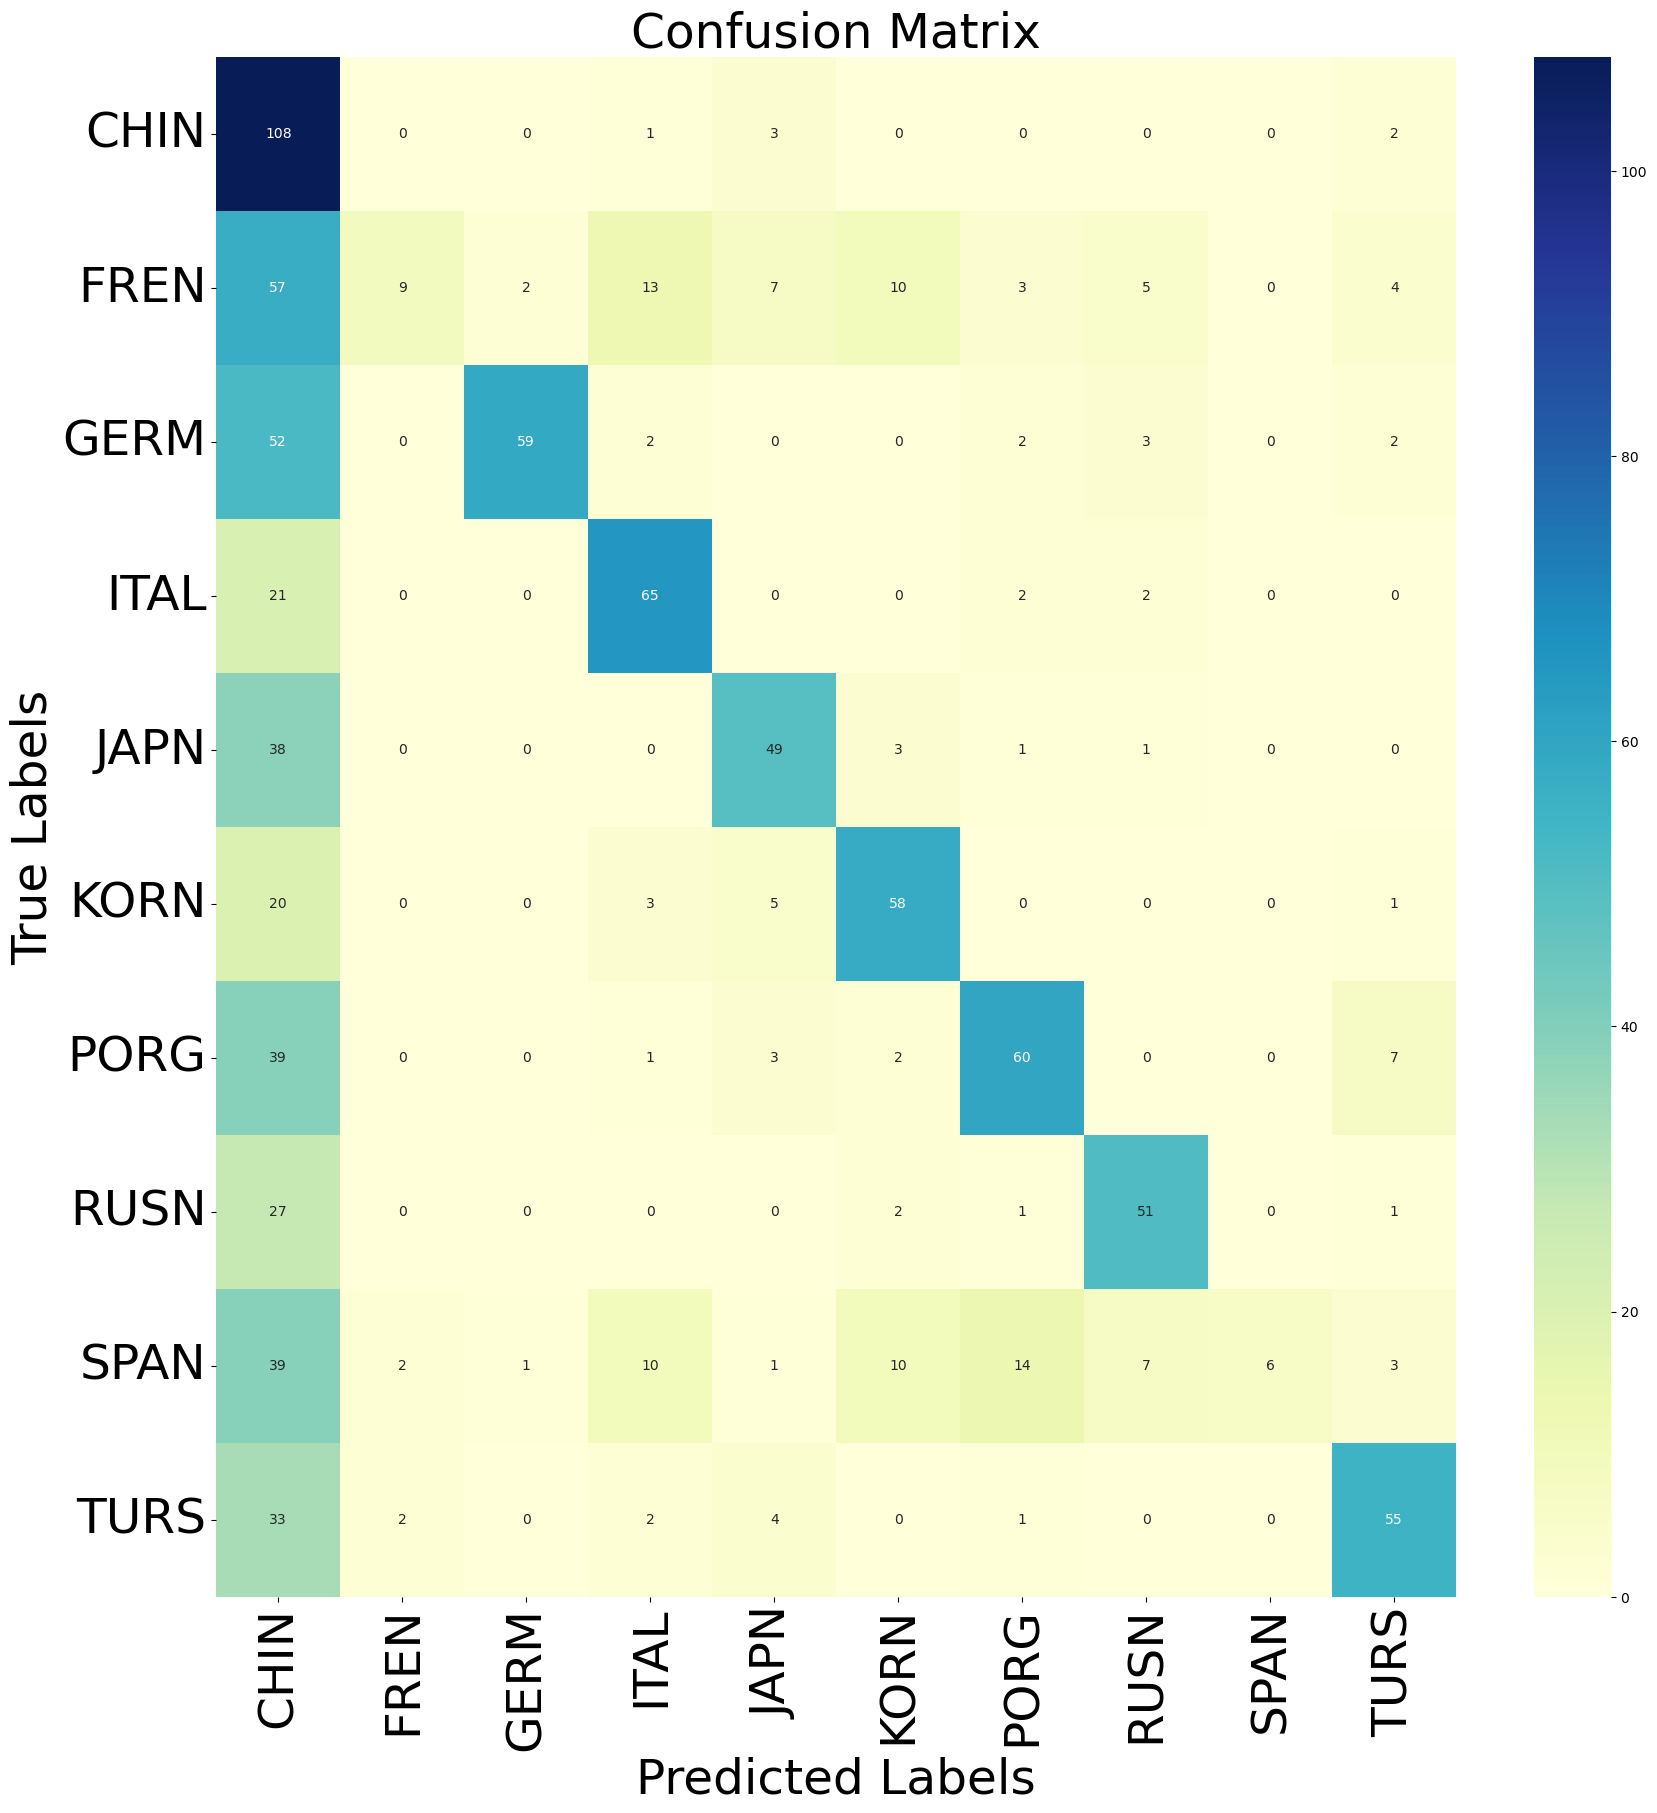

In [82]:

fig, ax = plt.subplots(figsize=(20,20))  
ax= plt.subplot()
sns.heatmap(confusion_matrix(Y_test, y_predicted1), annot=True,fmt='g', ax=ax,cmap="YlGnBu")

plt.rcParams.update({'font.size': 25})
plt.rc('font', size=35) 

ax.set_xlabel('Predicted Labels',fontsize = 35)
ax.set_ylabel('True Labels',fontsize = 35); 
ax.set_title('Confusion Matrix',fontsize = 35); 
ax.xaxis.set_ticklabels(['CHIN', 'FREN', 'GERM', 'ITAL', 'JAPN', 'KORN','PORG', 'RUSN', 'SPAN', 'TURS'],rotation = 90, fontsize = 35)
ax.yaxis.set_ticklabels(['CHIN', 'FREN', 'GERM', 'ITAL', 'JAPN', 'KORN','PORG', 'RUSN', 'SPAN', 'TURS'],rotation = 0, fontsize = 35)
plt.savefig("c_prsn4.png")

In [83]:
print(classification_report(Y_test, y_predicted1))

              precision    recall  f1-score   support

           0       0.25      0.95      0.39       114
           1       0.69      0.08      0.15       110
           2       0.95      0.49      0.65       120
           3       0.67      0.72      0.70        90
           4       0.68      0.53      0.60        92
           5       0.68      0.67      0.67        87
           6       0.71      0.54      0.61       112
           7       0.74      0.62      0.68        82
           8       1.00      0.06      0.12        93
           9       0.73      0.57      0.64        97

    accuracy                           0.52       997
   macro avg       0.71      0.52      0.52       997
weighted avg       0.71      0.52      0.51       997



In [84]:
X2 = computeKernelMatrix_intersection(4,4,V1)
print("done")


Computed kernel to row 499
Computed kernel to row 999
Computed kernel to row 1499
Computed kernel to row 1999
Computed kernel to row 2499
Computed kernel to row 2999
Computed kernel to row 3499
Computed kernel to row 3999
Computed kernel to row 4499
Computed kernel to row 4999
Computed kernel to row 5499
Computed kernel to row 6499
Computed kernel to row 6999
Computed kernel to row 7499
Computed kernel to row 7999
done


In [85]:
T2 = computeKernelMatrix_intersection_test(4,4,V1,V2)

Computed kernel to row 499


In [86]:
#intersection kernel 2

model2 = svm.SVC()
model2.fit(X2,Y_train)
y_predicted2 = model2.predict(T2)

print(f"The accuracy for intersection kernel with 4 gram is {accuracy_score(Y_test,y_predicted2)}-------features = {len(X2[0])}")
print("--" * 50)
intersection.append(accuracy_score(Y_test,y_predicted2))
###########################################################################################################################################

The accuracy for intersection kernel with 4 gram is 0.5305917753259779-------features = 8235
----------------------------------------------------------------------------------------------------


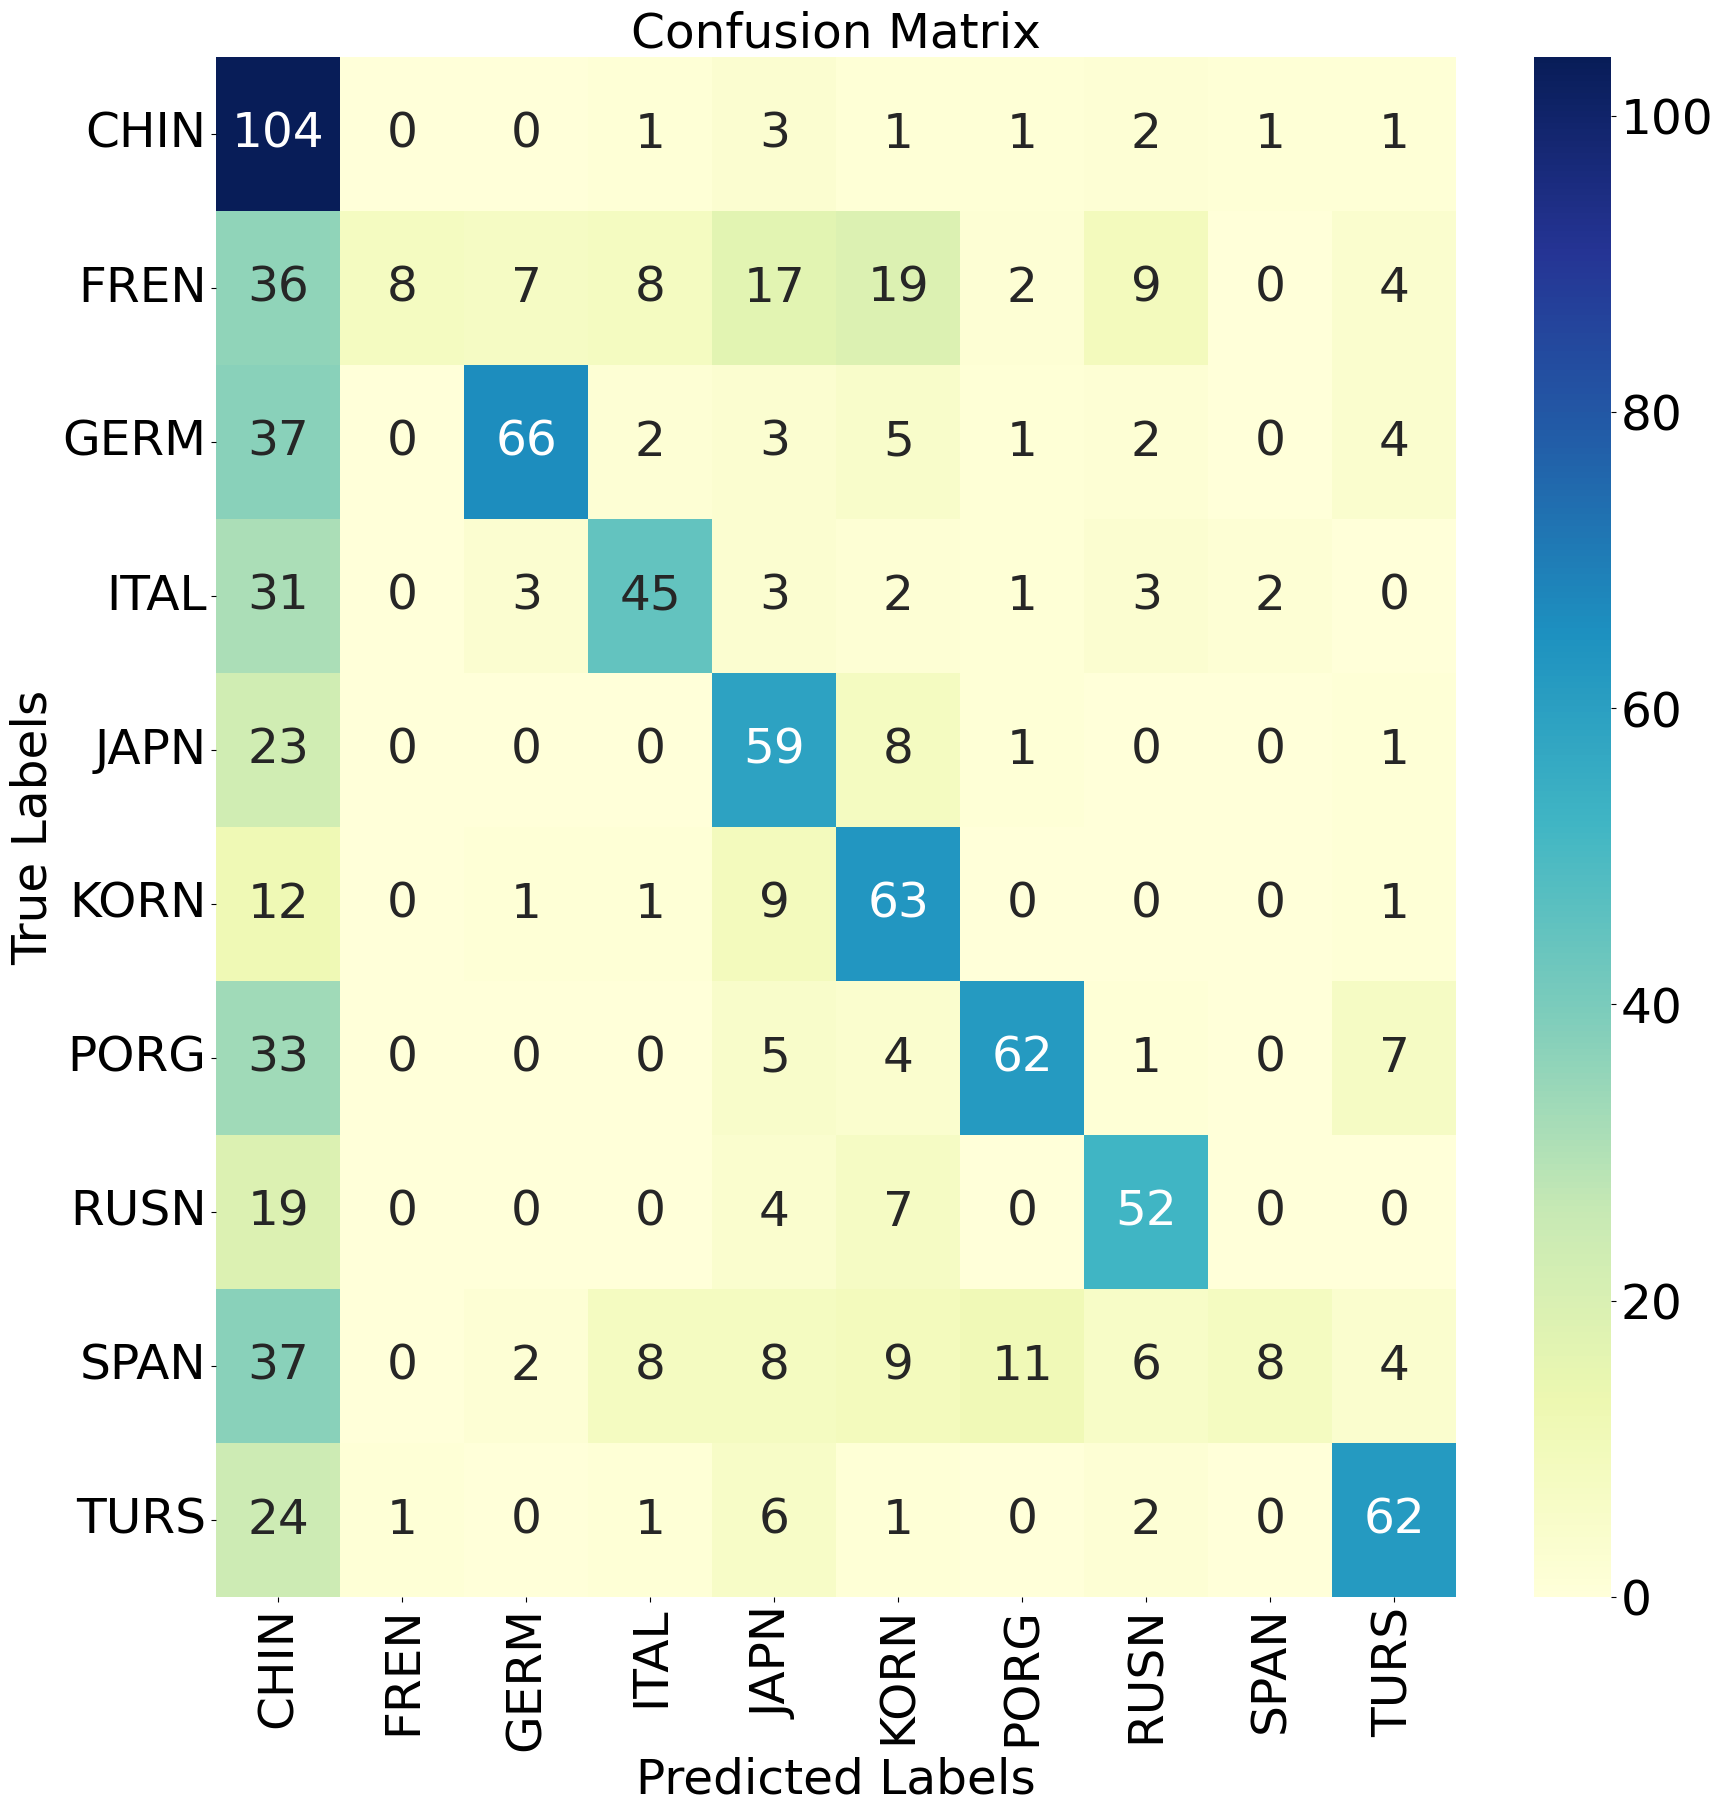

In [87]:
fig, ax = plt.subplots(figsize=(20,20))  
ax= plt.subplot()
sns.heatmap(confusion_matrix(Y_test, y_predicted2), annot=True,fmt='g', ax=ax,cmap="YlGnBu")

plt.rcParams.update({'font.size': 25})
plt.rc('font', size=35) 

ax.set_xlabel('Predicted Labels',fontsize = 35)
ax.set_ylabel('True Labels',fontsize = 35); 
ax.set_title('Confusion Matrix',fontsize = 35); 
ax.xaxis.set_ticklabels(['CHIN', 'FREN', 'GERM', 'ITAL', 'JAPN', 'KORN','PORG', 'RUSN', 'SPAN', 'TURS'],rotation = 90, fontsize = 35)
ax.yaxis.set_ticklabels(['CHIN', 'FREN', 'GERM', 'ITAL', 'JAPN', 'KORN','PORG', 'RUSN', 'SPAN', 'TURS'],rotation = 0, fontsize = 35)
plt.savefig("c_intr4.png")

In [88]:
print(classification_report(Y_test, y_predicted2))

              precision    recall  f1-score   support

           0       0.29      0.91      0.44       114
           1       0.89      0.07      0.13       110
           2       0.84      0.55      0.66       120
           3       0.68      0.50      0.58        90
           4       0.50      0.64      0.56        92
           5       0.53      0.72      0.61        87
           6       0.78      0.55      0.65       112
           7       0.68      0.63      0.65        82
           8       0.73      0.09      0.15        93
           9       0.74      0.64      0.69        97

    accuracy                           0.53       997
   macro avg       0.67      0.53      0.51       997
weighted avg       0.67      0.53      0.51       997



In [89]:
X3 = computeKernelMatrix_spectrum(4,4,V1)
print("done")

Computed kernel to row 499
Computed kernel to row 999
Computed kernel to row 1499
Computed kernel to row 1999
Computed kernel to row 2499
Computed kernel to row 2999
Computed kernel to row 3499
Computed kernel to row 3999
Computed kernel to row 4499
Computed kernel to row 4999
Computed kernel to row 5499
Computed kernel to row 5999
Computed kernel to row 6499
Computed kernel to row 6999
Computed kernel to row 7499
Computed kernel to row 7999
done


In [90]:
T3 = computeKernelMatrix_spectrum_test(4,4,V1,V2)

Computed kernel to row 499


In [91]:
#spectrum kernel 3

model3 = svm.SVC()
model3.fit(X3,Y_train)
y_predicted3 = model3.predict(T3)

print(f"The accuracy for spectrum kernel with 4 gram is {accuracy_score(Y_test,y_predicted3)}-------features = {len(X3[0])}")
print("--" * 50)
spectrum.append(accuracy_score(Y_test,y_predicted3))
############################################################################################################################################

The accuracy for spectrum kernel with 4 gram is 0.2928786359077232-------features = 8235
----------------------------------------------------------------------------------------------------


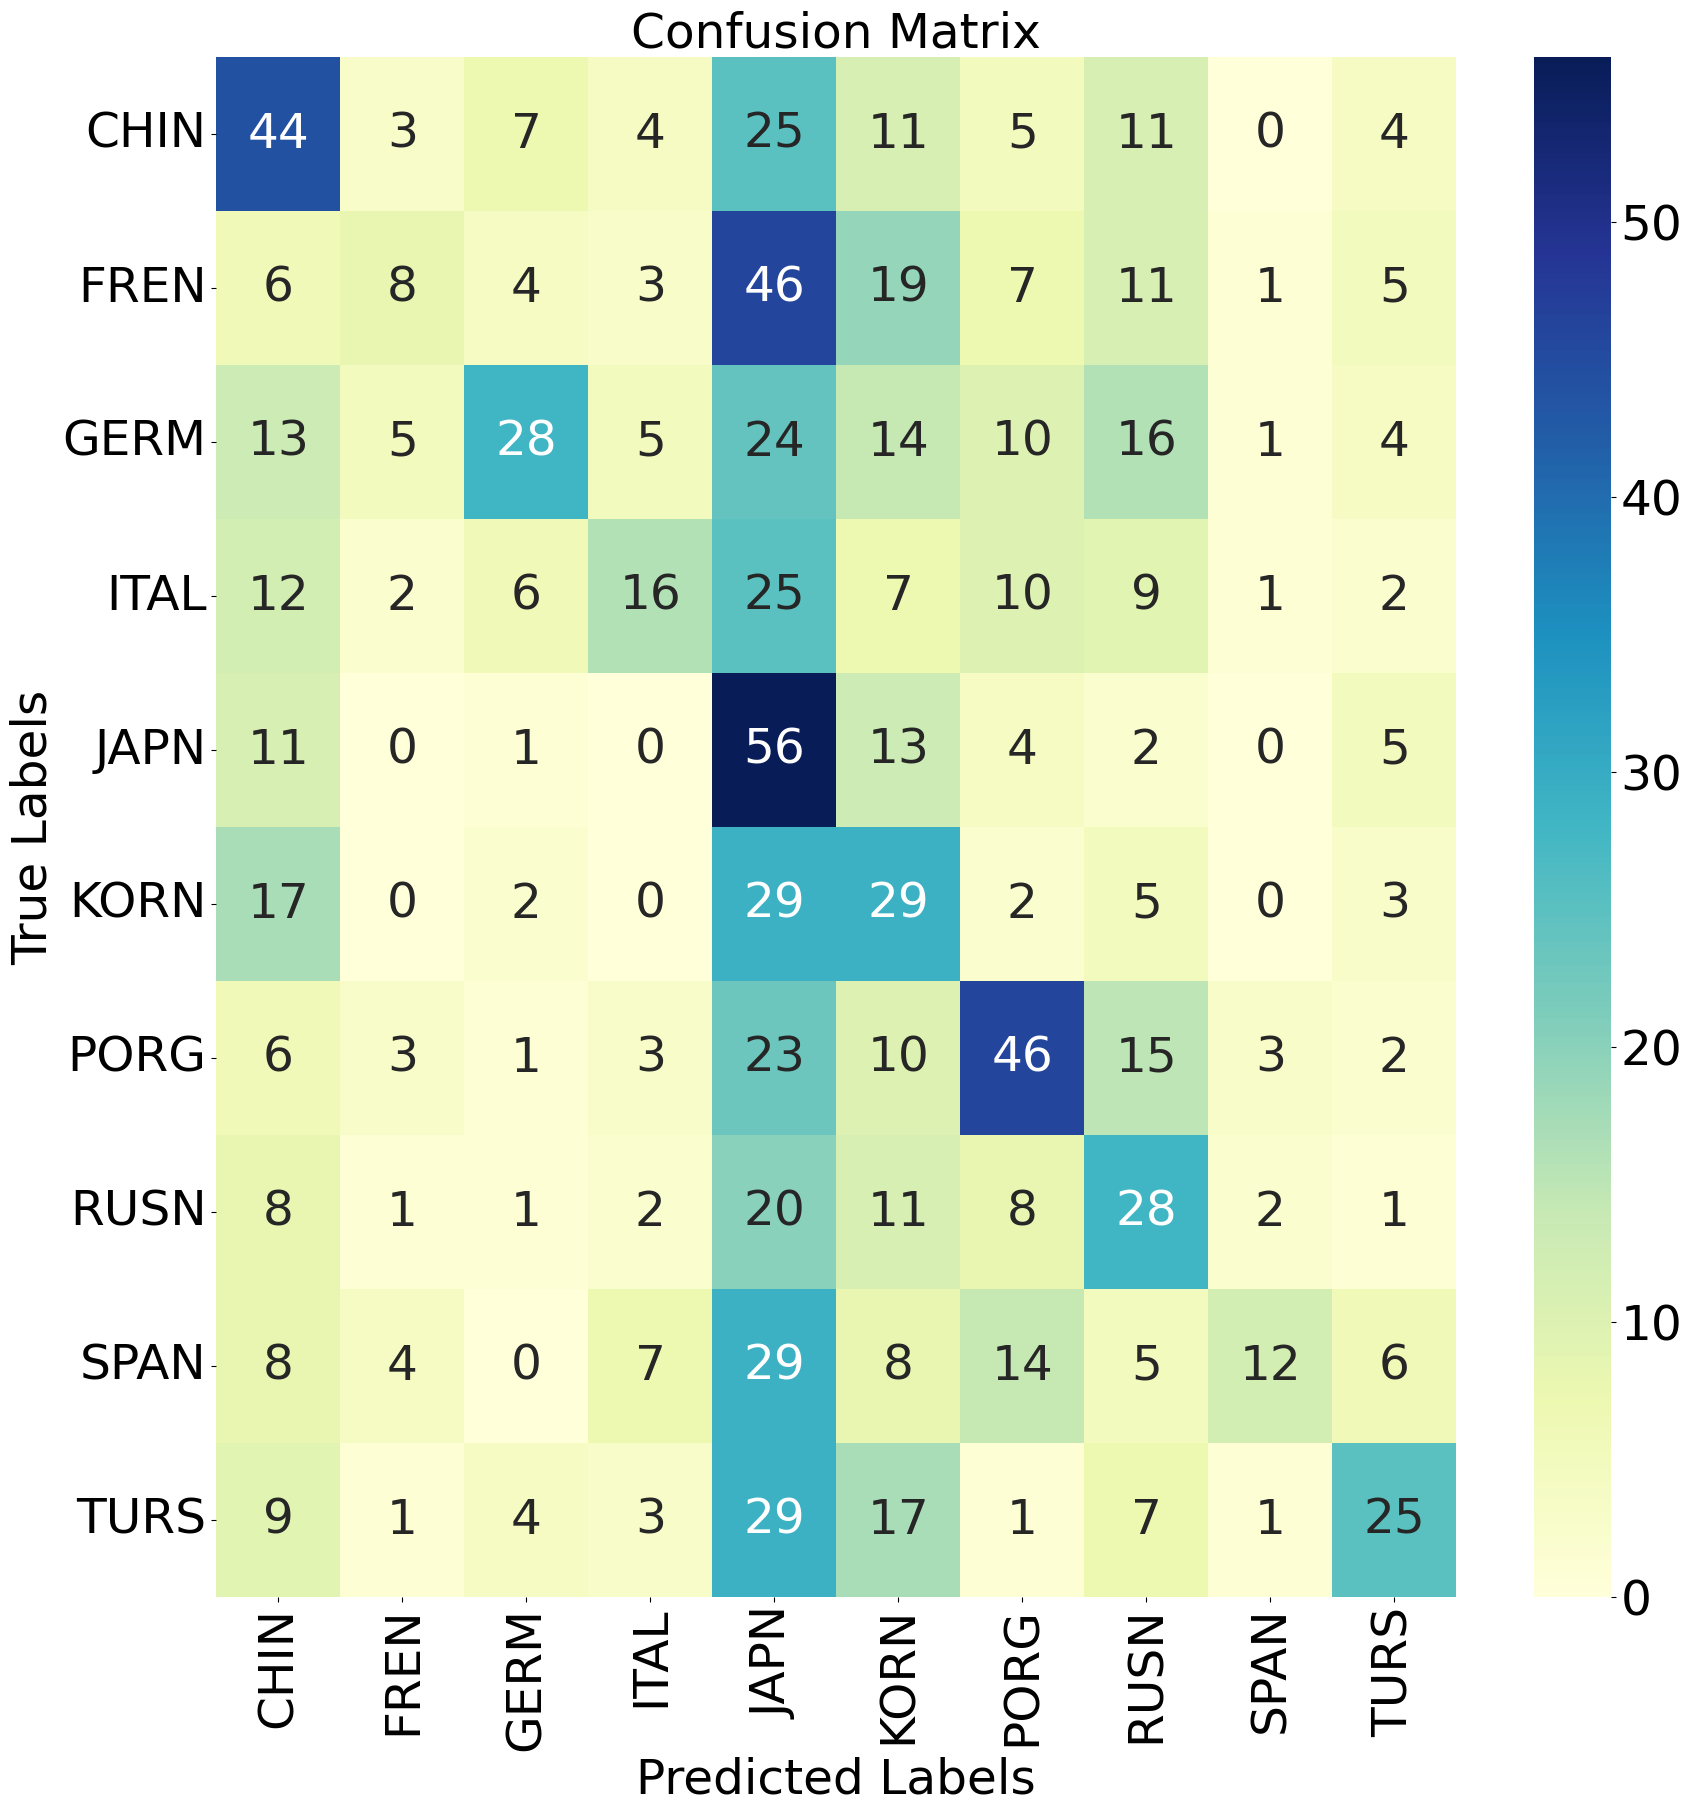

In [92]:
fig, ax = plt.subplots(figsize=(20,20))  
ax= plt.subplot()
sns.heatmap(confusion_matrix(Y_test, y_predicted3), annot=True,fmt='g', ax=ax,cmap="YlGnBu")

plt.rcParams.update({'font.size': 25})
plt.rc('font', size=35) 

ax.set_xlabel('Predicted Labels',fontsize = 35)
ax.set_ylabel('True Labels',fontsize = 35); 
ax.set_title('Confusion Matrix',fontsize = 35); 
ax.xaxis.set_ticklabels(['CHIN', 'FREN', 'GERM', 'ITAL', 'JAPN', 'KORN','PORG', 'RUSN', 'SPAN', 'TURS'],rotation = 90, fontsize = 35)
ax.yaxis.set_ticklabels(['CHIN', 'FREN', 'GERM', 'ITAL', 'JAPN', 'KORN','PORG', 'RUSN', 'SPAN', 'TURS'],rotation = 0, fontsize = 35)
plt.savefig("c_spct4.png")

In [93]:
print(classification_report(Y_test, y_predicted3))

              precision    recall  f1-score   support

           0       0.33      0.39      0.35       114
           1       0.30      0.07      0.12       110
           2       0.52      0.23      0.32       120
           3       0.37      0.18      0.24        90
           4       0.18      0.61      0.28        92
           5       0.21      0.33      0.26        87
           6       0.43      0.41      0.42       112
           7       0.26      0.34      0.29        82
           8       0.57      0.13      0.21        93
           9       0.44      0.26      0.32        97

    accuracy                           0.29       997
   macro avg       0.36      0.30      0.28       997
weighted avg       0.37      0.29      0.28       997



In [94]:
#X4 = X1 + X2
X4 = [[0] * (len(X1)) for _ in range(len(X1))]
for i in range(len(X1)):  
    for j in range(len(X1[i])):
        X4[i][j] = X1[i][j] + X2[i][j]

In [95]:
#T4 = T1 + T2
T4 = [[0] * (len(X1)) for _ in range(len(T1))]
for i in range(len(T1)):  
    for j in range(len(T1[i])):
        T4[i][j] = T1[i][j] + T2[i][j]

In [96]:

#presence + intersection kernel 4


model4 = svm.SVC()
model4.fit(X4,Y_train)

y_predicted4 = model4.predict(T4)

print(f"The accuracy for presence + intersection kernels with 4 gram is {accuracy_score(Y_test,y_predicted4)}-------features = {len(X4[0])}")
print("--" * 50)
presence_intersection.append(accuracy_score(Y_test,y_predicted4))
###############################################################################################################################################


The accuracy for presence + intersection kernels with 4 gram is 0.5095285857572718-------features = 8235
----------------------------------------------------------------------------------------------------


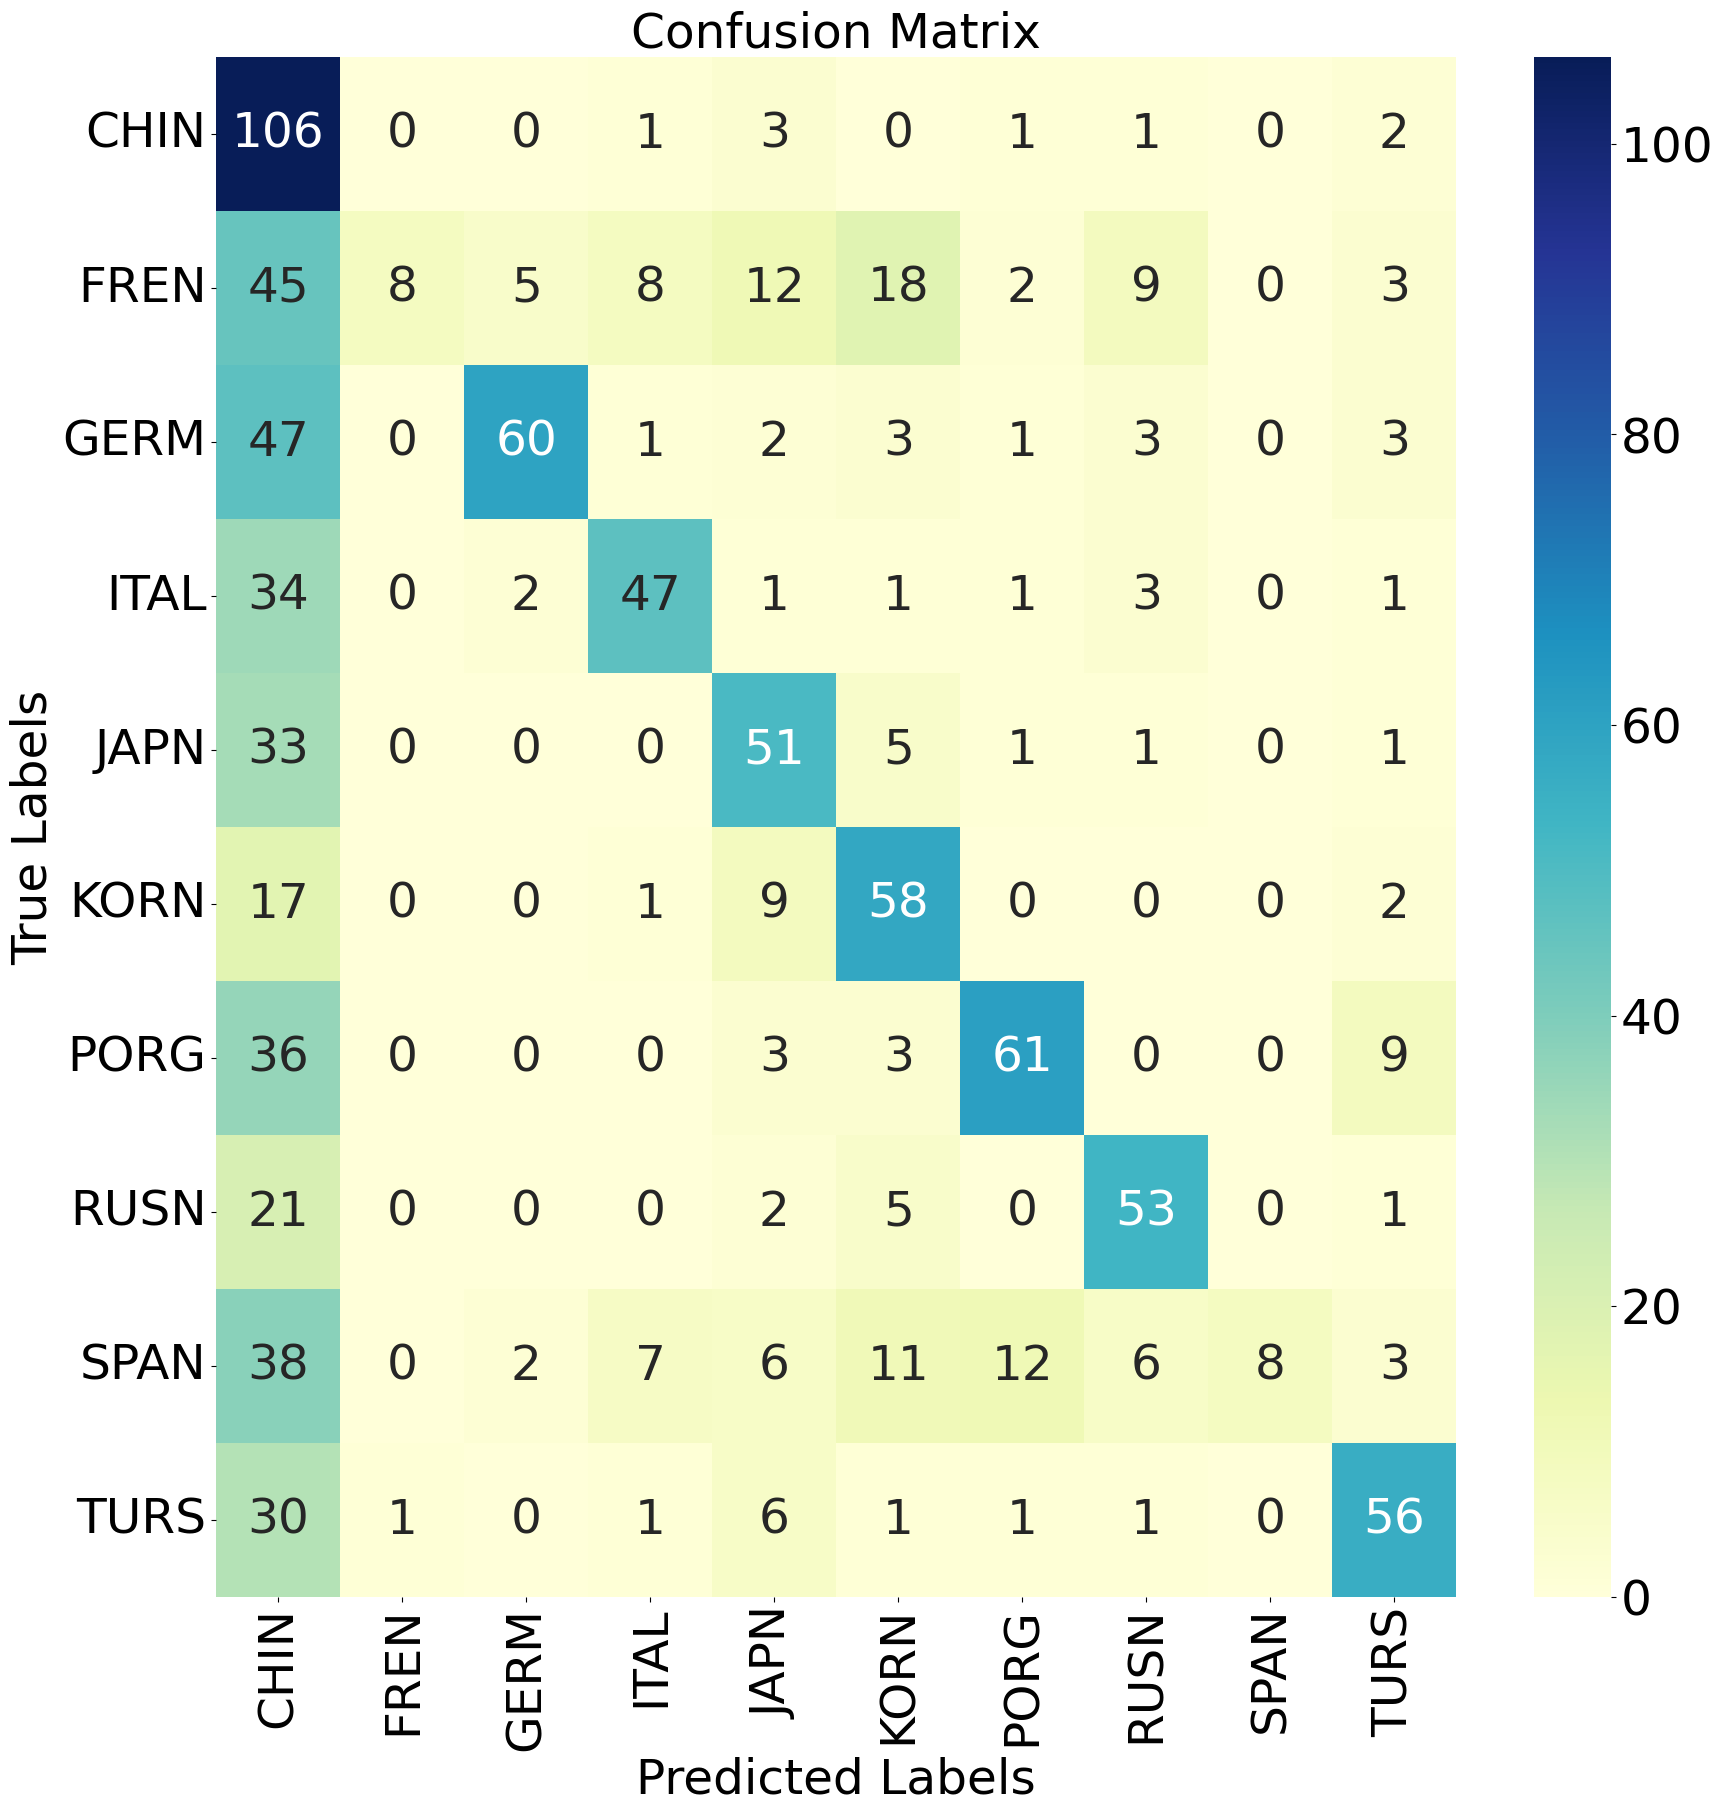

In [97]:
fig, ax = plt.subplots(figsize=(20,20))  
ax= plt.subplot()
sns.heatmap(confusion_matrix(Y_test, y_predicted4), annot=True,fmt='g', ax=ax,cmap="YlGnBu")

plt.rcParams.update({'font.size': 25})
plt.rc('font', size=35) 

ax.set_xlabel('Predicted Labels',fontsize = 35)
ax.set_ylabel('True Labels',fontsize = 35); 
ax.set_title('Confusion Matrix',fontsize = 35); 
ax.xaxis.set_ticklabels(['CHIN', 'FREN', 'GERM', 'ITAL', 'JAPN', 'KORN','PORG', 'RUSN', 'SPAN', 'TURS'],rotation = 90, fontsize = 35)
ax.yaxis.set_ticklabels(['CHIN', 'FREN', 'GERM', 'ITAL', 'JAPN', 'KORN','PORG', 'RUSN', 'SPAN', 'TURS'],rotation = 0, fontsize = 35)
plt.savefig("c_prsn+intr4.png")

In [98]:
print(classification_report(Y_test, y_predicted4))

              precision    recall  f1-score   support

           0       0.26      0.93      0.41       114
           1       0.89      0.07      0.13       110
           2       0.87      0.50      0.63       120
           3       0.71      0.52      0.60        90
           4       0.54      0.55      0.55        92
           5       0.55      0.67      0.60        87
           6       0.76      0.54      0.64       112
           7       0.69      0.65      0.67        82
           8       1.00      0.09      0.16        93
           9       0.69      0.58      0.63        97

    accuracy                           0.51       997
   macro avg       0.70      0.51      0.50       997
weighted avg       0.70      0.51      0.50       997



In [99]:

#X5 = X2 + X3
X5 = [[0] * (len(X1)) for _ in range(len(X1))]
for i in range(len(X2)):  
    for j in range(len(X2[i])):
        X5[i][j] = X2[i][j] + X3[i][j]

In [100]:
#T5 = T2 + T3
T5 = [[0] * (len(X1)) for _ in range(len(T1))]
for i in range(len(T5)):  
    for j in range(len(T5[i])):
        T5[i][j] = T2[i][j] + T3[i][j]

In [101]:

#intesection + spectrum kernels 5

model5 = svm.SVC()
model5.fit(X5,Y_train)

y_predicted5 = model5.predict(T5)

print(f"The accuracy for intersection + spectrum kernels with 4 gram is {accuracy_score(Y_test,y_predicted5)}-------features = {len(X5[0])}")
print("--" * 50)
intersection_spectrum.append(accuracy_score(Y_test,y_predicted5))
###############################################################################################################################################


The accuracy for intersection + spectrum kernels with 4 gram is 0.3319959879638917-------features = 8235
----------------------------------------------------------------------------------------------------


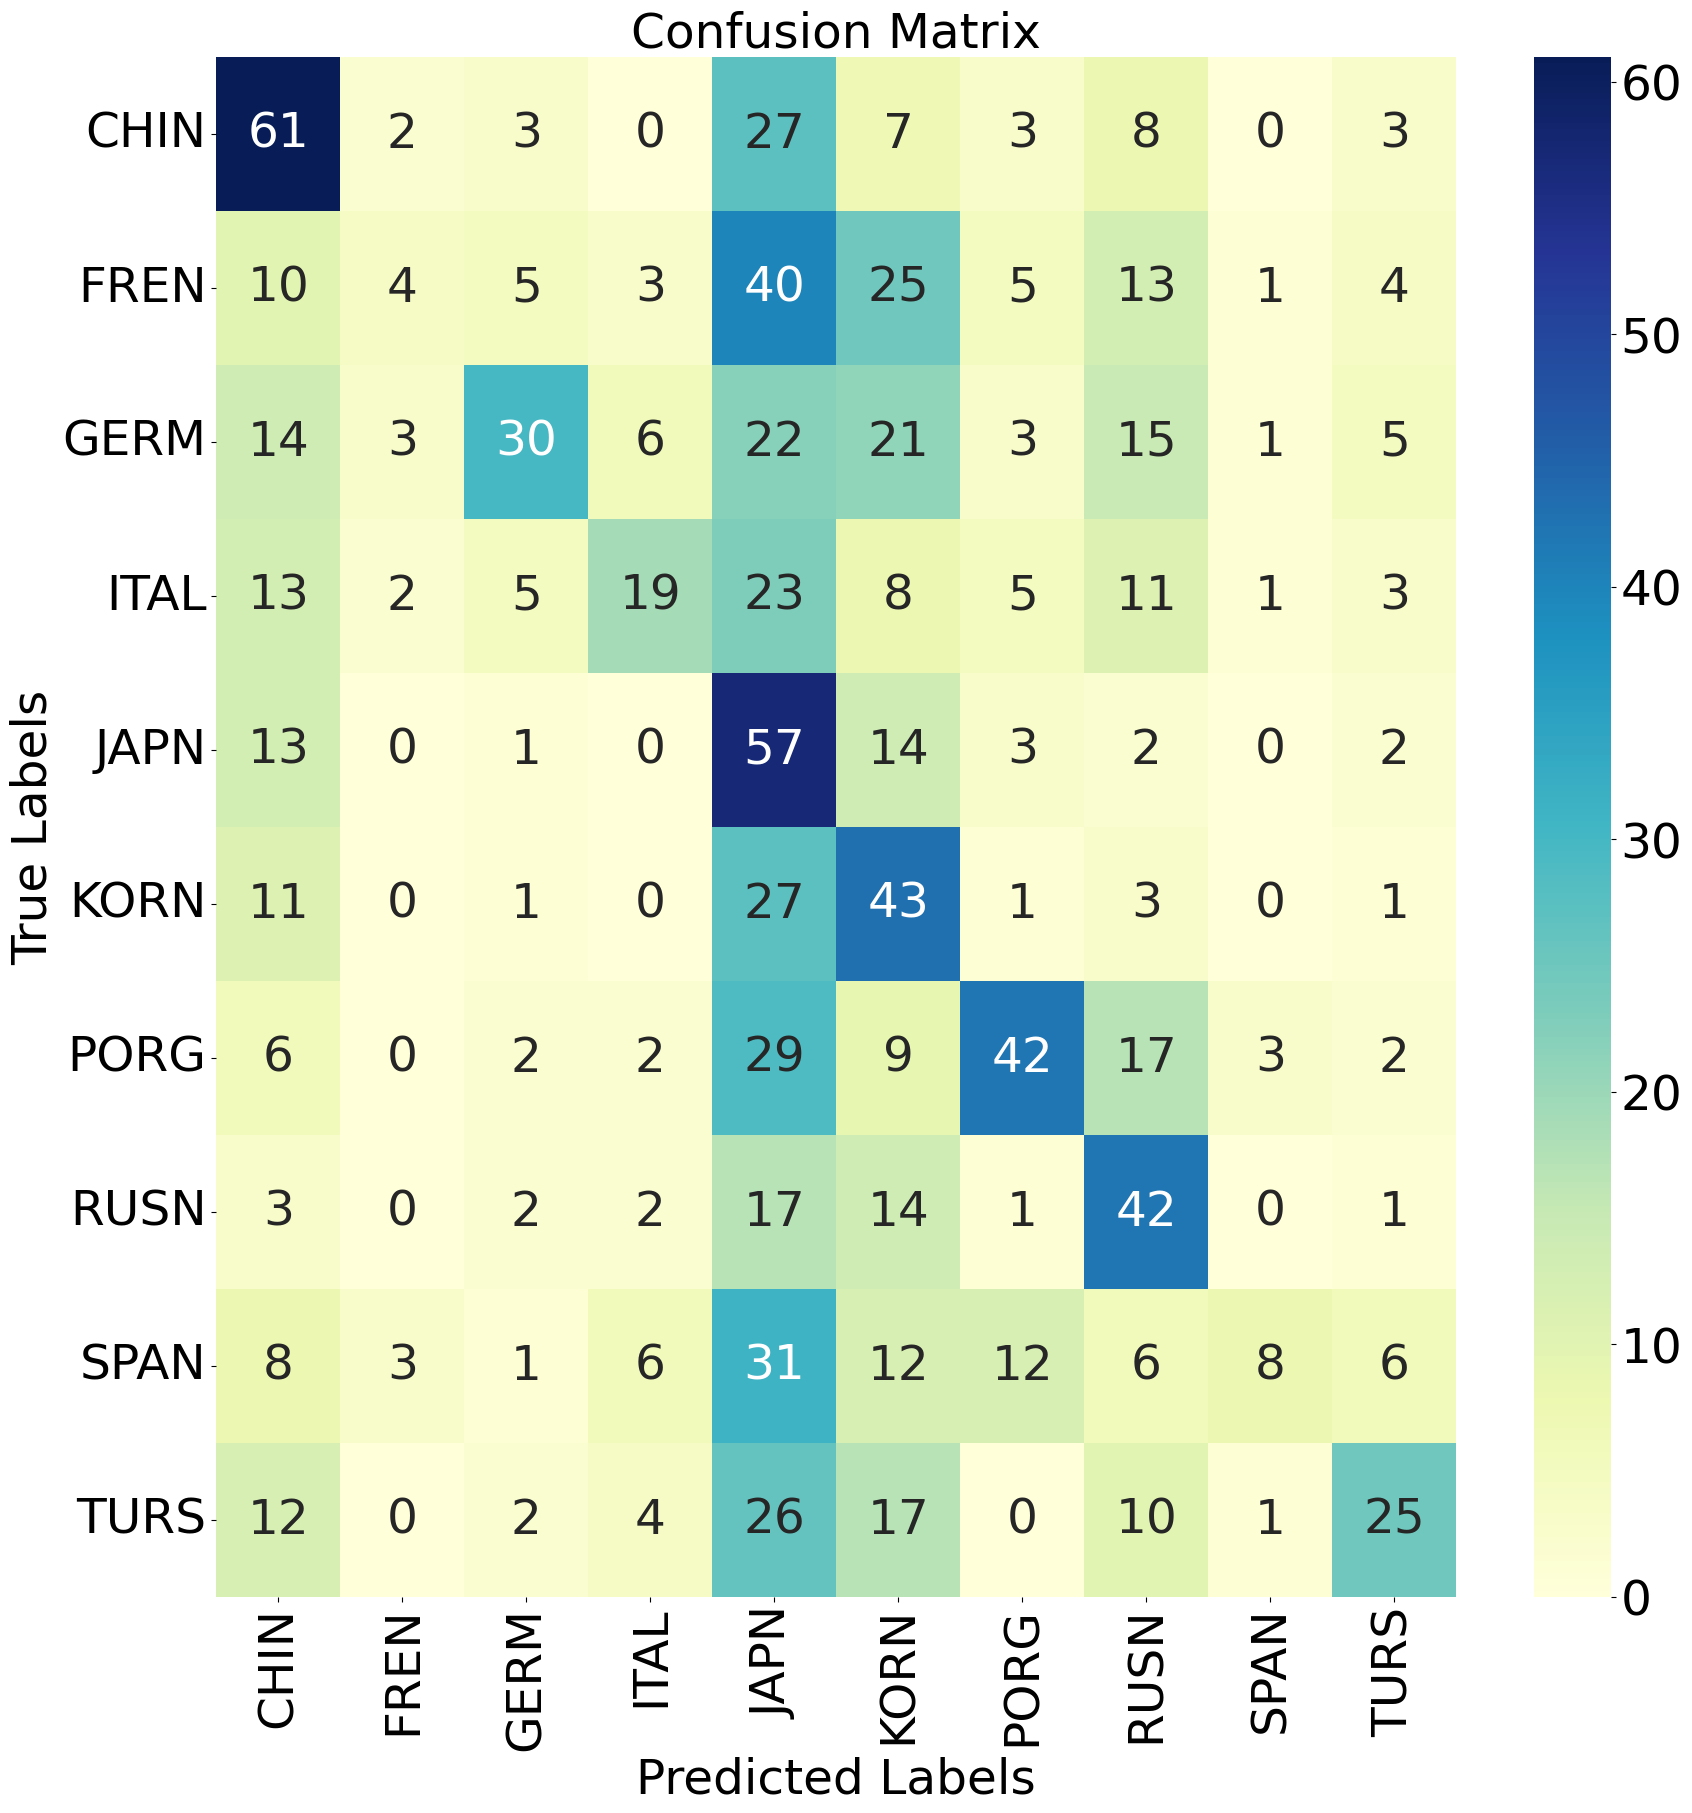

In [102]:
fig, ax = plt.subplots(figsize=(20,20))  
ax= plt.subplot()
sns.heatmap(confusion_matrix(Y_test, y_predicted5), annot=True,fmt='g', ax=ax,cmap="YlGnBu")

plt.rcParams.update({'font.size': 25})
plt.rc('font', size=35) 

ax.set_xlabel('Predicted Labels',fontsize = 35)
ax.set_ylabel('True Labels',fontsize = 35); 
ax.set_title('Confusion Matrix',fontsize = 35); 
ax.xaxis.set_ticklabels(['CHIN', 'FREN', 'GERM', 'ITAL', 'JAPN', 'KORN','PORG', 'RUSN', 'SPAN', 'TURS'],rotation = 90, fontsize = 35)
ax.yaxis.set_ticklabels(['CHIN', 'FREN', 'GERM', 'ITAL', 'JAPN', 'KORN','PORG', 'RUSN', 'SPAN', 'TURS'],rotation = 0, fontsize = 35)
plt.savefig("c_intr+spct4.png")

In [103]:
print(classification_report(Y_test, y_predicted5))

              precision    recall  f1-score   support

           0       0.40      0.54      0.46       114
           1       0.29      0.04      0.06       110
           2       0.58      0.25      0.35       120
           3       0.45      0.21      0.29        90
           4       0.19      0.62      0.29        92
           5       0.25      0.49      0.33        87
           6       0.56      0.38      0.45       112
           7       0.33      0.51      0.40        82
           8       0.53      0.09      0.15        93
           9       0.48      0.26      0.34        97

    accuracy                           0.33       997
   macro avg       0.41      0.34      0.31       997
weighted avg       0.41      0.33      0.31       997



In [104]:
#X6 = X1 + X3
X6 = [[0] * (len(X1)) for _ in range(len(X1))]
for i in range(len(X1)):  
    for j in range(len(X1[i])):
        X6[i][j] = X1[i][j] + X3[i][j]

In [105]:
#T6 = T1 + T3
T6 = [[0] * (len(X1)) for _ in range(len(T1))]
for i in range(len(T6)):  
    for j in range(len(T6[i])):
        T6[i][j] = T1[i][j] + T3[i][j]

In [106]:

#spectrum + presence kernel 6


model6 = svm.SVC()
model6.fit(X6,Y_train)

y_predicted6 = model6.predict(T6)

print(f"The accuracy for presence + spectrum kernel with 4 gram is {accuracy_score(Y_test,y_predicted6)}-------features = {len(X6[0])}")
print("--" * 50)
spectrum_presence.append(accuracy_score(Y_test,y_predicted6))
##############################################################################################################################################

The accuracy for presence + spectrum kernel with 4 gram is 0.32898696088264795-------features = 8235
----------------------------------------------------------------------------------------------------


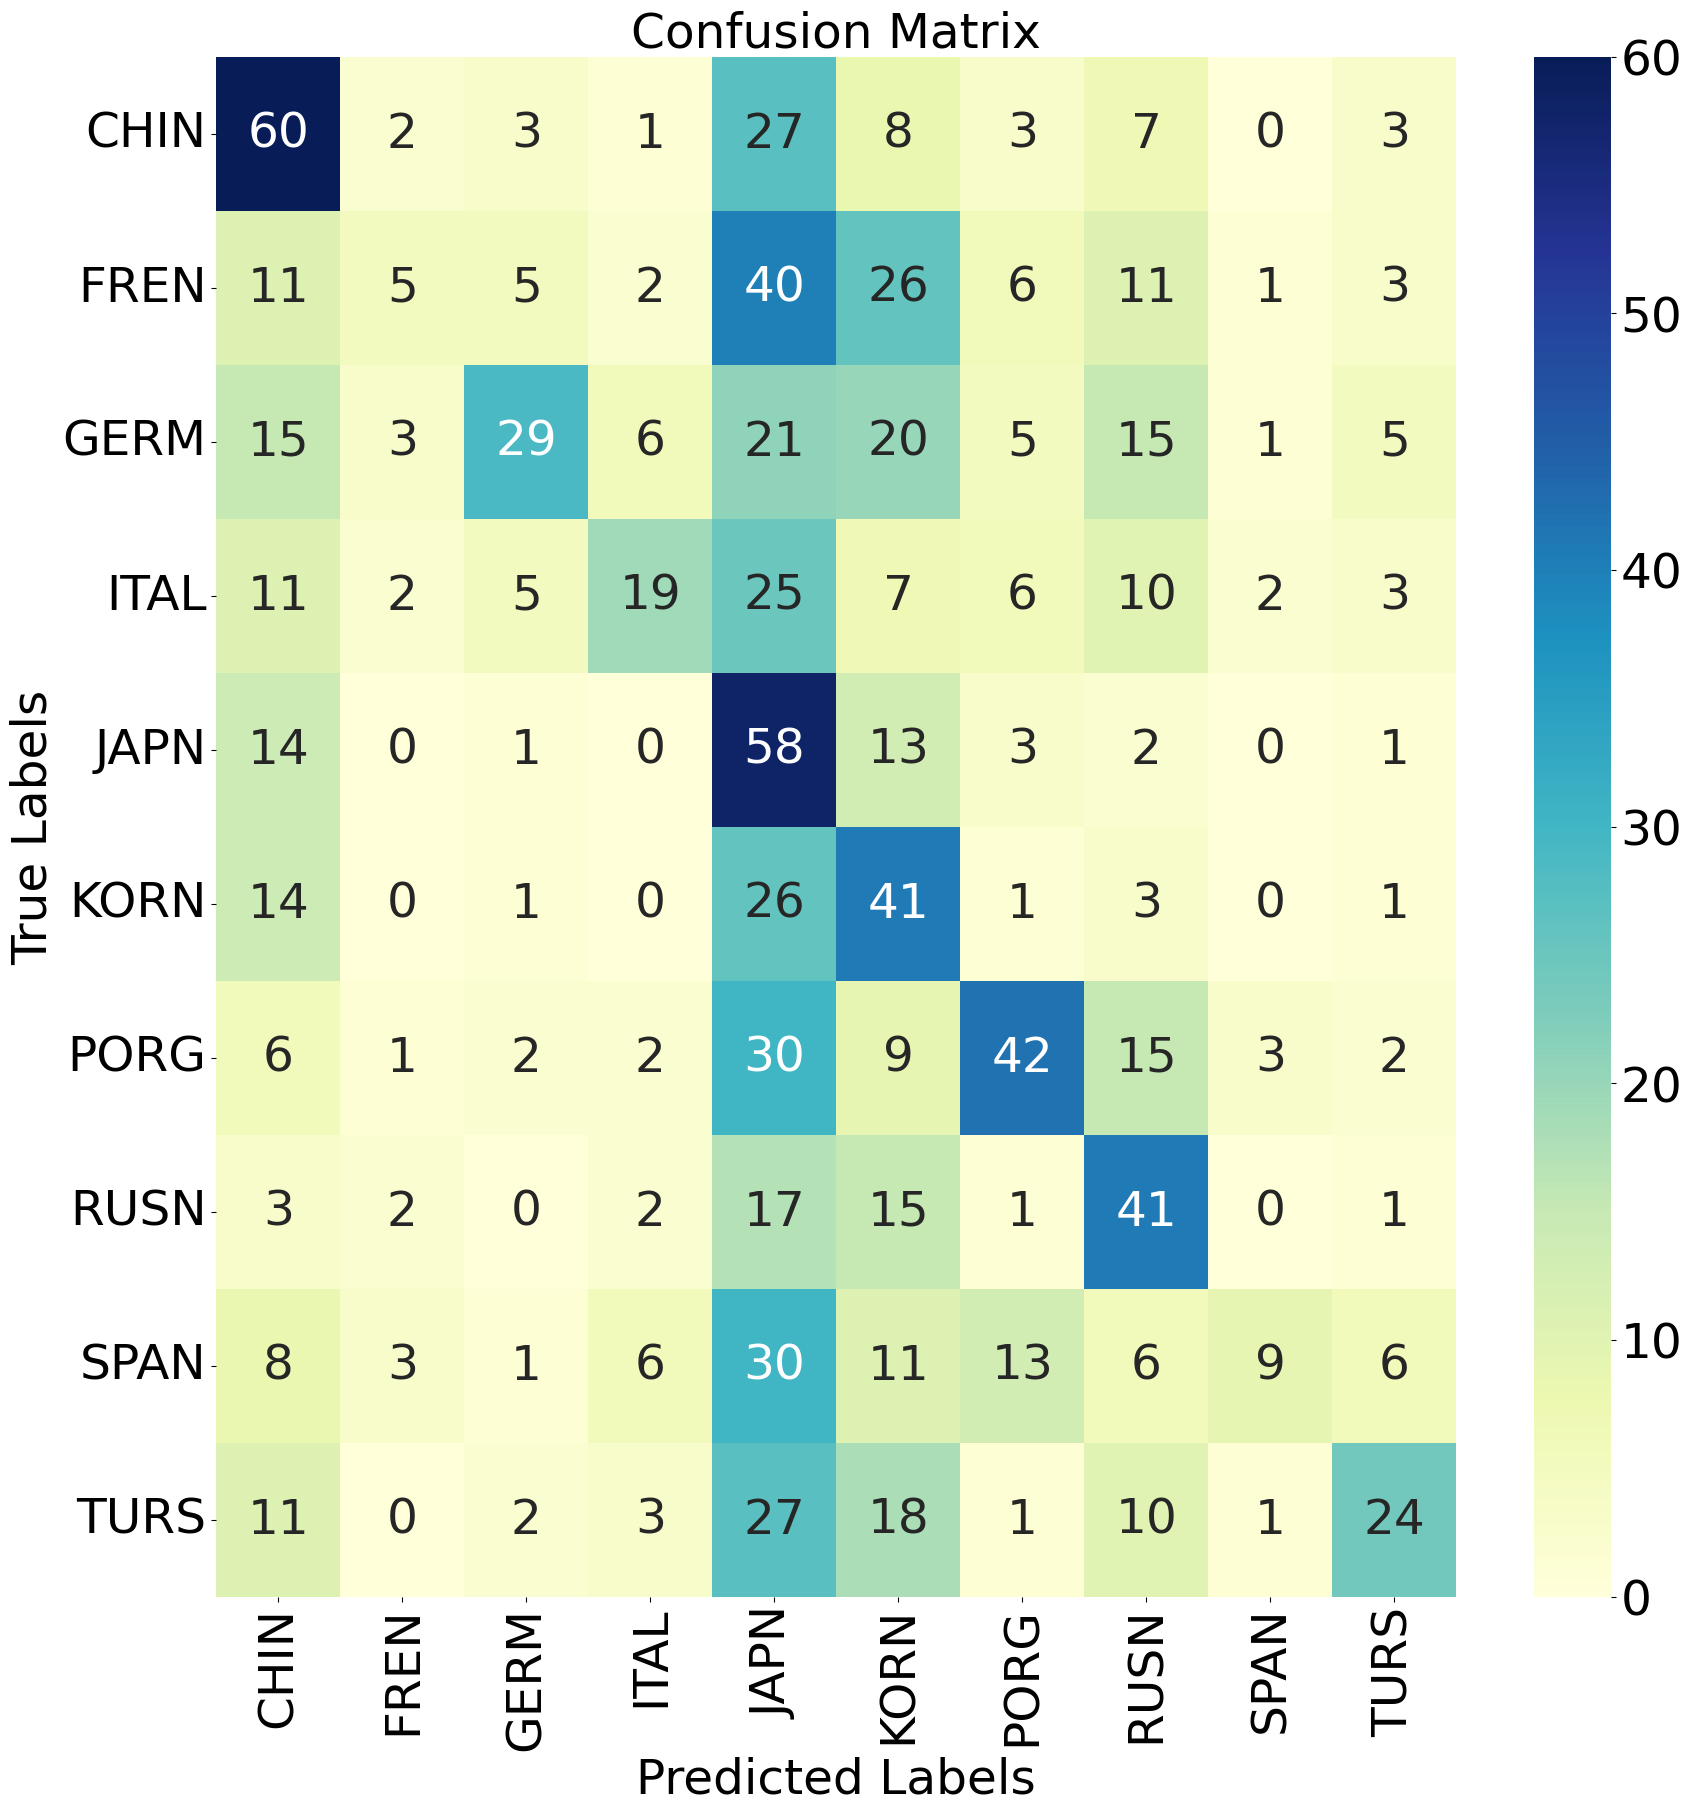

In [107]:
fig, ax = plt.subplots(figsize=(20,20))  
ax= plt.subplot()
sns.heatmap(confusion_matrix(Y_test, y_predicted6), annot=True,fmt='g', ax=ax,cmap="YlGnBu")

plt.rcParams.update({'font.size': 25})
plt.rc('font', size=35) 

ax.set_xlabel('Predicted Labels',fontsize = 35)
ax.set_ylabel('True Labels',fontsize = 35); 
ax.set_title('Confusion Matrix',fontsize = 35); 
ax.xaxis.set_ticklabels(['CHIN', 'FREN', 'GERM', 'ITAL', 'JAPN', 'KORN','PORG', 'RUSN', 'SPAN', 'TURS'],rotation = 90, fontsize = 35)
ax.yaxis.set_ticklabels(['CHIN', 'FREN', 'GERM', 'ITAL', 'JAPN', 'KORN','PORG', 'RUSN', 'SPAN', 'TURS'],rotation = 0, fontsize = 35)
plt.savefig("c_intr+spct4.png")

In [108]:
print(classification_report(Y_test, y_predicted6))

              precision    recall  f1-score   support

           0       0.39      0.53      0.45       114
           1       0.28      0.05      0.08       110
           2       0.59      0.24      0.34       120
           3       0.46      0.21      0.29        90
           4       0.19      0.63      0.30        92
           5       0.24      0.47      0.32        87
           6       0.52      0.38      0.44       112
           7       0.34      0.50      0.41        82
           8       0.53      0.10      0.16        93
           9       0.49      0.25      0.33        97

    accuracy                           0.33       997
   macro avg       0.40      0.33      0.31       997
weighted avg       0.41      0.33      0.31       997



In [109]:
#X7 = X1 + X2 + X3

X7 = [[0] * (len(X1)) for _ in range(len(X1))]
for i in range(len(X1)):  
    for j in range(len(X1[i])):
        X7[i][j] = X1[i][j] + X2[i][j] + X3[i][j]


In [110]:
#T7 = T1 + T2 + T3

T7 = [[0] * (len(X1)) for _ in range(len(T1))]
for i in range(len(T7)):  
    for j in range(len(T7[i])):
        T7[i][j] = T1[i][j] + T2[i][j] + T3[i][j]


In [111]:

#presence + intersection + spectrum kernel 7

model7 = svm.SVC()
model7.fit(X7,Y_train)

y_predicted7 = model7.predict(T7)

print(f"The accuracy for presence + intersection + spectrum kernel with 4 gram is {accuracy_score(Y_test,y_predicted7)}-------features = {len(X7[0])}")
print("--" * 50)
presence_intersection_spectrum.append(accuracy_score(Y_test,y_predicted7))




The accuracy for presence + intersection + spectrum kernel with 4 gram is 0.37011033099297896-------features = 8235
----------------------------------------------------------------------------------------------------


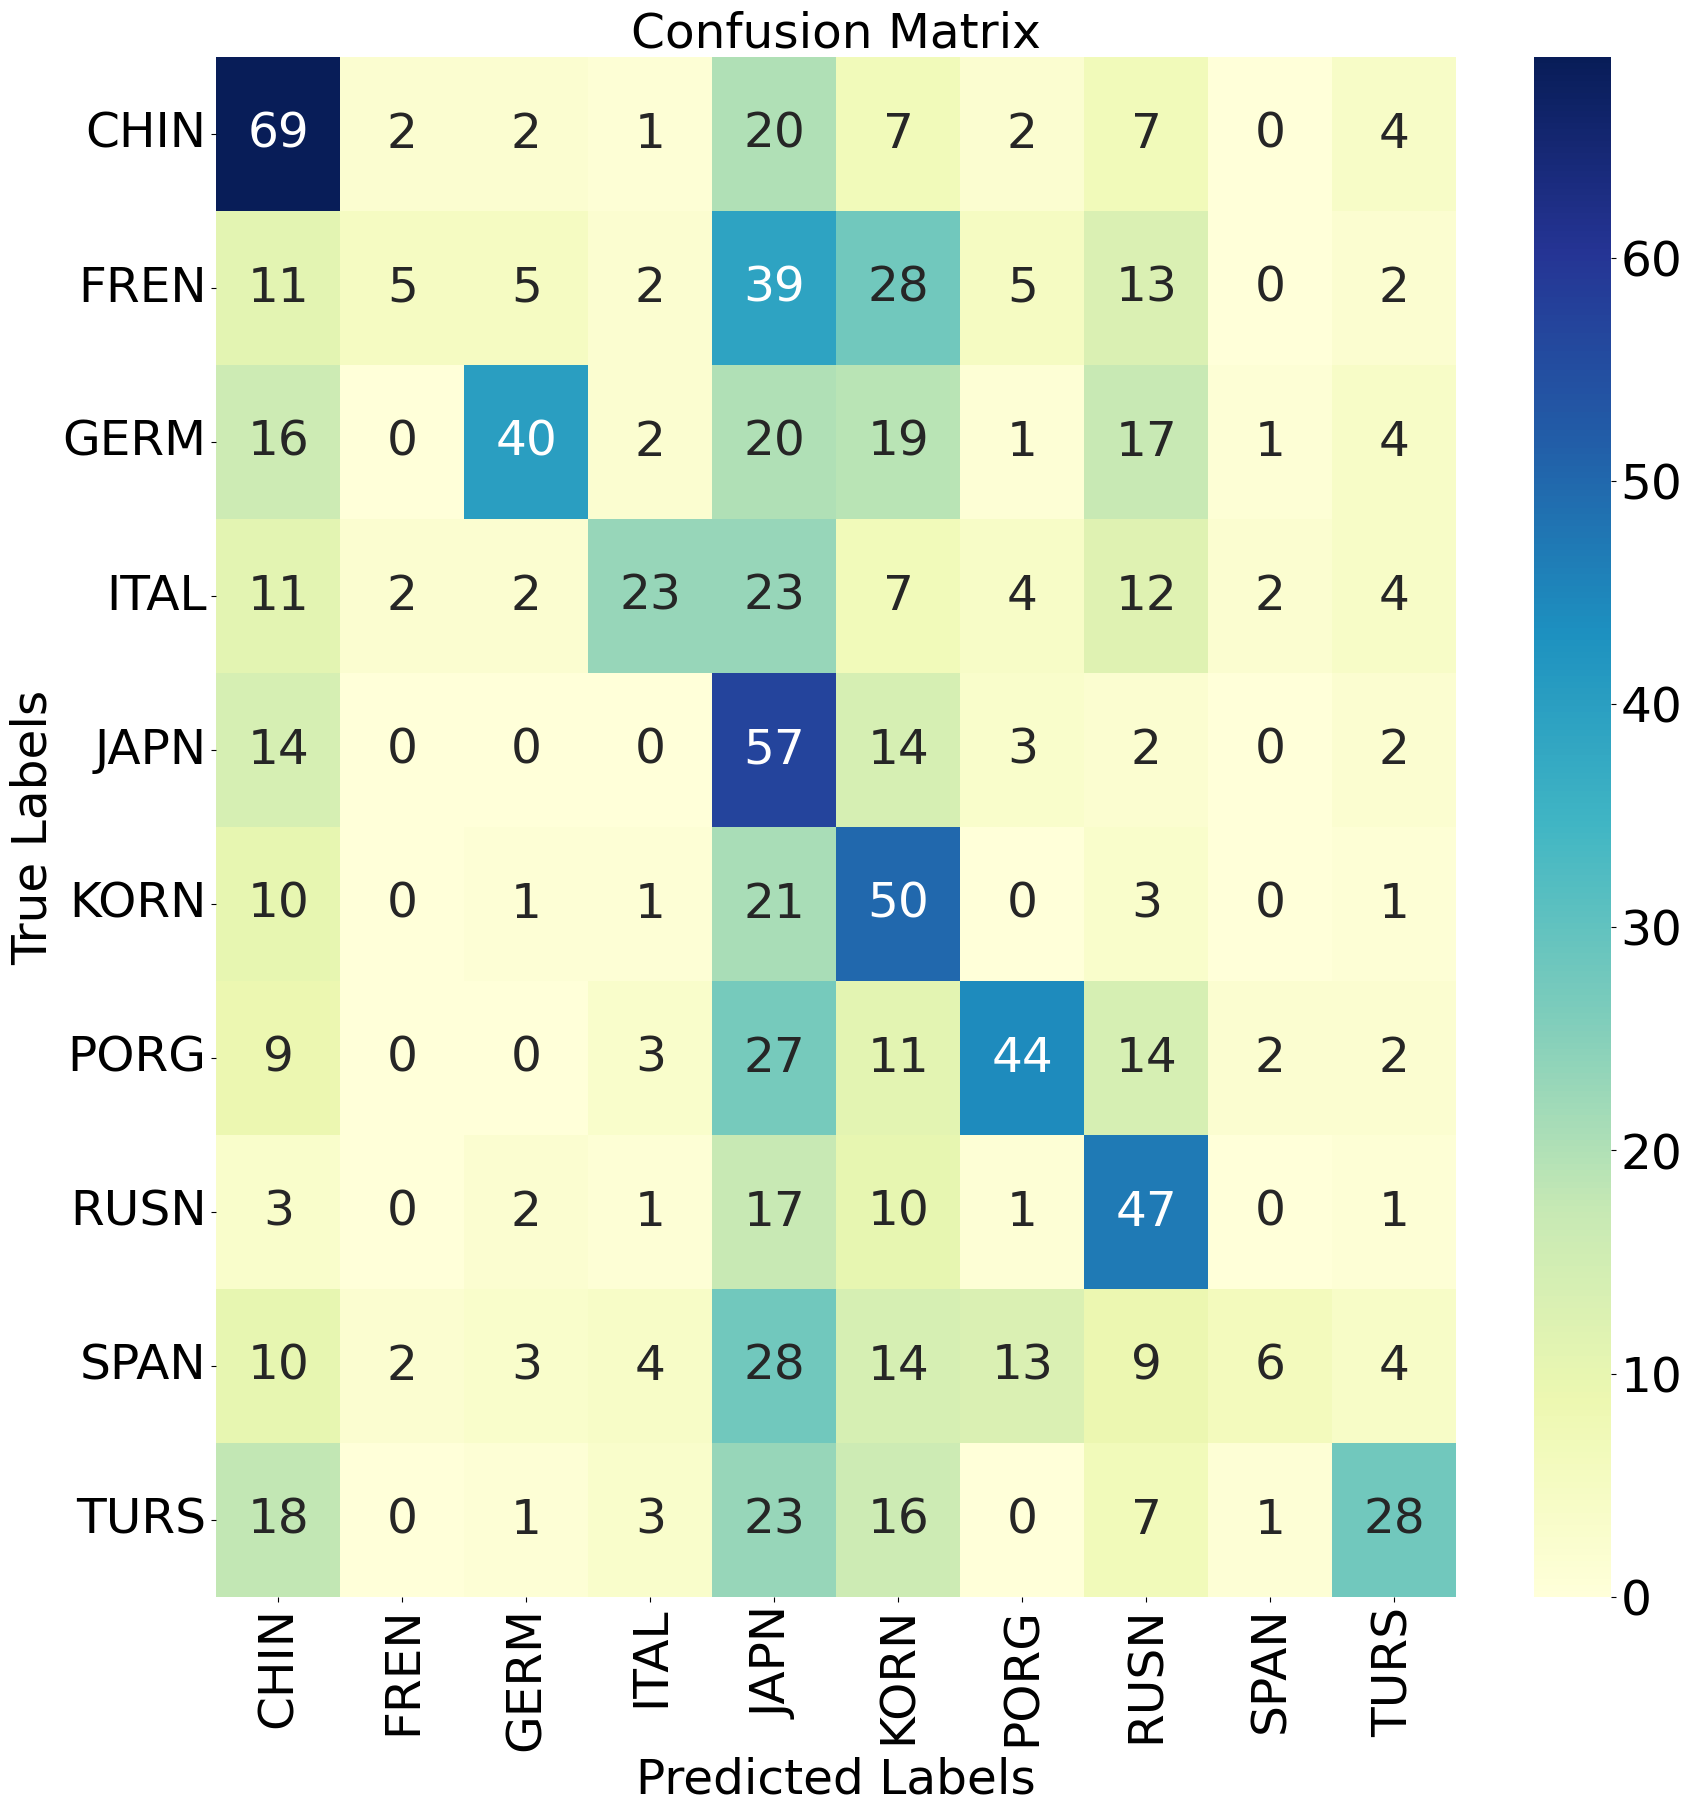

In [112]:
fig, ax = plt.subplots(figsize=(20,20))  
ax= plt.subplot()
sns.heatmap(confusion_matrix(Y_test, y_predicted7), annot=True,fmt='g', ax=ax,cmap="YlGnBu")

plt.rcParams.update({'font.size': 25})
plt.rc('font', size=35) 

ax.set_xlabel('Predicted Labels',fontsize = 35)
ax.set_ylabel('True Labels',fontsize = 35); 
ax.set_title('Confusion Matrix',fontsize = 35); 
ax.xaxis.set_ticklabels(['CHIN', 'FREN', 'GERM', 'ITAL', 'JAPN', 'KORN','PORG', 'RUSN', 'SPAN', 'TURS'],rotation = 90, fontsize = 35)
ax.yaxis.set_ticklabels(['CHIN', 'FREN', 'GERM', 'ITAL', 'JAPN', 'KORN','PORG', 'RUSN', 'SPAN', 'TURS'],rotation = 0, fontsize = 35)
plt.savefig("c_prsn+intr+spct4.png")

In [113]:
print(classification_report(Y_test, y_predicted7))

              precision    recall  f1-score   support

           0       0.40      0.61      0.48       114
           1       0.45      0.05      0.08       110
           2       0.71      0.33      0.45       120
           3       0.57      0.26      0.35        90
           4       0.21      0.62      0.31        92
           5       0.28      0.57      0.38        87
           6       0.60      0.39      0.48       112
           7       0.36      0.57      0.44        82
           8       0.50      0.06      0.11        93
           9       0.54      0.29      0.38        97

    accuracy                           0.37       997
   macro avg       0.46      0.38      0.35       997
weighted avg       0.47      0.37      0.35       997



In [114]:
X1 = 0
X2 = 0
X3 = 0
X4 = 0
X5 = 0
X6 = 0
X7 = 0

In [ ]:
df17["ngrams_taken"] = ngrams1
df17["Bits_Presence_Kernel"] = presence
df17["Intersection_Kernel "] = intersection
df17["Spectrum_Kernel"] = spectrum
df17["Bits_Presence + Intersection kernels"] = presence_intersection
df17["Intersection + spectrum kernels"] = intersection_spectrum
df17["presence + intersection + Spectrum Kernels"] = presence_intersection_spectrum

In [ ]:


df17.to_csv(' results with character grams on test data .csv', encoding = 'utf-8-sig') 
#files.download('new results with word grams on test data.csv')